# INTRODUCTION

**DATA ANALYTICS AND VISUALISATION ASSIGNMENT**

---

**ASSIGNMENT GIVEN BY: KADATEMY**

**PERFORMED BY: DR. IFUNANYA STELLAMARIS ANYANWU (formerly CHINWEUBA) (DR. STM)**

**DATE: 28TH APRIL 2022**

**OVERVIEW**

This assignment was given by Kadatemy to test each student's level of understanding the data analytics and visualisation classes that we have been taught so far.

It was also to assess our curiosity and research skills regarding how we solve problems beyond what was taught in the classroom.

The dataset used herein was gotten from the [Github link](https://github.com/sharonibejih/Analysis-on-Nigerians-Demography) of our tutor - Sharon Ibejih, and my solutions are presented forward.

The presentation tone I used in this task is semi-formal.

Equally, for interpretation purposes, the currency for the monetary values in this document is Nigerian Naira (NGN).

# Loading my warfare 😀

In [1]:
# Loading my Google drive to access files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#calling on the particular folder containing the files
%cd /content/drive/MyDrive/My pythons/Nig Demo data

/content/drive/MyDrive/My pythons/Nig Demo data


In [ ]:
#installing the researchpy library so that I can call it for importing

!pip install researchpy

In [ ]:
#official loading of my warfare libraries 😀

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats

In [5]:
#calling on the first and main dataset file

dataset = pd.read_csv("/content/drive/MyDrive/My pythons/Nig Demo data/NIGERIA_DEMOGRAPHICS_DATA.csv")

# High-level examination and cleaning of the data

Here, I looked through the data to assess for missing values and made a choice on how to deal with them.

I equally renamed the titles for easy usage 

In [6]:
# Having a quick look on what my dataset looks like
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Timestamp                                                                           303 non-null    object 
 1   Are you a Nigerian?                                                                 288 non-null    object 
 2   Gender                                                                              303 non-null    object 
 3   Age Group                                                                           303 non-null    object 
 4   Are you married?                                                                    303 non-null    object 
 5   Do you have kids?                                                                   303 non-null   

This showed that I have 303 uniques cases (rows) and 22 variables (columns)

Most of the variables are objects or simply say "categorical" variables while two are numerical.

The non-null count also showed that their are some missing values but I'll have a deeper/easire look at that as I progress.

So, let's first rename the columns' titles, they are way too busy and clumsy. I like my life easy 😀

In [7]:
#renaming the column titles

dataset.rename(columns = {"Are you a Nigerian?": "Nigerian",
                       "Are you married?": "Married",
                    "Do you have kids?": "Parent" , 
                    "Where do you live?": "State of residence", 
                    "What part of your state do you live in?": "Area of residence", 
                    "Are you Happy with your job?": "Job satisfaction", 
                    "Is this your primary source of income?": "Job as primary income",
                   "What is your steady/constant income range in a month?": "Monthly Primary Income",
                   "Do you think it is enough for you and your family?": "Income sufficiency",
                   "What are your other sources of income? ": "Secondary income",
                   "Do you pay your tax?": "Pays tax",
                   "What is your largest form of expense": "Largest expense",
                   "If there was one thing you really wanted to own, what would that be?": "Aspiring Possession",
                   "How much do you think you earn from all other sources of income in a month": "Cumulative secondary income",
                   "On an average, how much do you think you spend in a month?": "Monthly expenditure",
                   "Do you think Nigeria can get better?": "Better Nigeria",
                   "In a short sentence, describe your government": "Thought about the government",
                   "Please fill your email if you want to be notified once this research is completed.": "E-mails"},
               inplace= True)

Okay, now that we have shorter and neater titles, we will progress to check those null values and then think of what to do with them.

In [8]:
#checking for the variables with null values
dataset.isnull().sum()

Timestamp                         0
Nigerian                         15
Gender                            0
Age Group                         0
Married                           0
Parent                            0
State of residence                0
Area of residence                 0
Occupation                        1
Job satisfaction                  0
Job as primary income             0
Monthly Primary Income            0
Income sufficiency                0
Secondary income                  1
Pays tax                          0
Largest expense                   0
Aspiring Possession               0
Cumulative secondary income       1
Monthly expenditure               0
Better Nigeria                    0
Thought about the government      1
E-mails                         122
dtype: int64

From the result above, we can see that six variables ("Nigerian", "Occupation", "Secondary income", "Cumulative secondary income", "Thought about the government", and "E-mails") have one or more missing variables.

What do you think we should do with them?

What would you do if you were in my shoes?

Don't be too quick, chill, make your decision and let's drive on to see my decison 👀

By now, you can tell that I love stories right 😀

In [9]:
#checking out the look of those variables so I can know how to make my decisions

print("NIGERIAN:")
print(dataset["Nigerian"].describe())
print("\n")
print("OCCUPATION:")
print(dataset["Occupation"].describe())
print("\n")
print("SECONDARY INCOME:")
print(dataset["Secondary income"].describe())
print("\n")
print("CUMULATIVE SECONDARY INCOME:")
print(dataset["Cumulative secondary income"].describe())
print("\n")
print("THOUGHT ABOUT THE GOVERNMENT:")
print(dataset["Thought about the government"].describe())

NIGERIAN:
count     288
unique      2
top       Yes
freq      285
Name: Nigerian, dtype: object


OCCUPATION:
count                                       302
unique                                       13
top       Software Engineering /Computer Design
freq                                         50
Name: Occupation, dtype: object


SECONDARY INCOME:
count      302
unique      17
top       None
freq       102
Name: Secondary income, dtype: object


CUMULATIVE SECONDARY INCOME:
count    3.020000e+02
mean     6.627668e+07
std      8.124313e+08
min      0.000000e+00
25%      5.500000e+01
50%      1.500000e+04
75%      5.000000e+04
max      1.000000e+10
Name: Cumulative secondary income, dtype: float64


THOUGHT ABOUT THE GOVERNMENT:
count         302
unique        268
top       Corrupt
freq            7
Name: Thought about the government, dtype: object


Okay, we are done looking!

The "Nigerian" variable: Most people answered "Yes", so I think I'll settle with giving the silent peeps the "Yes" tag too.

For "Occupation", I had up to 13 unique values, meaning that it is realaly diverse,so I assumed that if someone really has a job, it won't be had for that person to flaunt it, so that person that left it empty likely has no job, so I chose to fill with "No job".

Alright!

How about "Secondary income", I made the same assumption I did in "Occupation" and filled with "None"

And then, for the "Cumulative secondary income", I made same assumption and even super-assumed that it could be the same case who left secondary income empty that still left this one empty, so I simply filled with "0"

Lastly!

"Thought about the government" ... whoop!
That was one hell of a variable! 268 unique values! Can you imagine that.
Well, I simply asked my dear python to just fill forward with the answer from a preceding case, we all be alright after all 😀.

Observe that I ommitted the last variable - E-mails; 
Yes, that's because I have a different plan for it, you'll see it later.

In [10]:
#filling the missing values as decided

dataset.loc[ :,("Nigerian")] =  dataset["Nigerian"].fillna("Yes")
dataset.loc[:,("Occupation")]= dataset["Occupation"].fillna("No Job")
dataset.loc[:,("Secondary income")] = dataset["Secondary income"].fillna("None")
dataset.loc[:,("Cumulative secondary income")]= dataset["Cumulative secondary income"].fillna(0)
dataset.loc[:,("Thought about the government")]= dataset["Thought about the government"].fillna(method="ffill")

#and rechecking afterwards
dataset.isnull().sum()

Timestamp                         0
Nigerian                          0
Gender                            0
Age Group                         0
Married                           0
Parent                            0
State of residence                0
Area of residence                 0
Occupation                        0
Job satisfaction                  0
Job as primary income             0
Monthly Primary Income            0
Income sufficiency                0
Secondary income                  0
Pays tax                          0
Largest expense                   0
Aspiring Possession               0
Cumulative secondary income       0
Monthly expenditure               0
Better Nigeria                    0
Thought about the government      0
E-mails                         122
dtype: int64

So now, we are good.

Only the "E-mails" column has some missing values in it.

But what did STM do? I dropped it. I don't think I will be doing anything with it here so I let it go.

Oh, by the way, if you are wondering who is "STM", that is me ... just in case 😉😀

In [11]:
#dropping the E-mails column and rechecking afterwards

dataset.drop(["Timestamp", "E-mails"], axis = 1, inplace = True)
dataset.isnull().sum()

Nigerian                        0
Gender                          0
Age Group                       0
Married                         0
Parent                          0
State of residence              0
Area of residence               0
Occupation                      0
Job satisfaction                0
Job as primary income           0
Monthly Primary Income          0
Income sufficiency              0
Secondary income                0
Pays tax                        0
Largest expense                 0
Aspiring Possession             0
Cumulative secondary income     0
Monthly expenditure             0
Better Nigeria                  0
Thought about the government    0
dtype: int64

Great!

We are now good to go and do some real analytics and visualisation stuff.

Congrats, you passed your level 1 😀

Let's go!

# Descriptive analysis

I thought it wise to first have a descriptive view and analysis of all my variables to see what they are really like and how they are distributed before I started exploring how they are related with each other in the next section.

So let me walk you through my processes 

In [12]:
#Having a quick look at my dataset again
dataset.head(3)

,Nigerian,Gender,Age Group,Married,Parent,State of residence,Area of residence,Occupation,Job satisfaction,Job as primary income,Monthly Primary Income,Income sufficiency,Secondary income,Pays tax,Largest expense,Aspiring Possession,Cumulative secondary income,Monthly expenditure,Better Nigeria,Thought about the government
0,Yes,Female,18 – 25,No,No,Lagos,Rural,No Job,No,No,Below 5000,No,None,No,Feeding,A Company,0.0,25000,Yes,Frustrating
1,Yes,Female,18 – 25,No,No,Lagos,Rural,No Job,No,No,"11,000 – 20,000",No,Free Lancing,No,Transportation,A House,18000.0,20000,Yes,"Greedy, self centered and dull"
2,Yes,Male,36 – 45,Yes,Yes,Lagos,City,Financial Services,Yes,Yes,"110,000 – 200,000",No,Free Lancing,Yes,School Fees,A Company,40000.0,140000,Yes,Our government do not care about what the mass...


So, let me tell what I did here so you don't snap on me 😀

This next line of code was generated after I had performed the task that follows it.
I generated those graphs and figured out that some values in some variables were really long and making my charts look clumsy and ugly ... and as a beautiful woman (😀) I'll definitely love to produce beautiful works too right?


So I came forward here to replace some of those values with shorter words/phrases, just like I did with the titles earlier, and now we can have a more satisfying look at the generated charts.

In [13]:
#Replacing some values of some variables with shorter words or phrases

dataset["Occupation"]= dataset["Occupation"].replace("Software Engineering /Computer Design", "Software eng.")
dataset["Occupation"]= dataset["Occupation"].replace("Financial Services", "Fin. service")
dataset["Occupation"]= dataset["Occupation"].replace("Student and Working", "Std & working")
dataset["Largest expense"]= dataset["Largest expense"].replace("Clothing and Jewelry", "Cloth/Jewelry")
dataset["Largest expense"]= dataset["Largest expense"].replace("Airtime and Data", "Airtime/data")
dataset["Largest expense"]= dataset["Largest expense"].replace("Transportation", "Transport")

Now, I decided to use subplots to present multiple graphs at the same time. I did this for two reasons:

1.   For easier look and comparison with other variables
2.   For a shorter and non-boring presentation.

So, let's have a look at it

Text(0.5, 0.98, 'FIGURE 1: CATEGORICAL VARIABLES REPRESENTED IN BAR CHARTS')

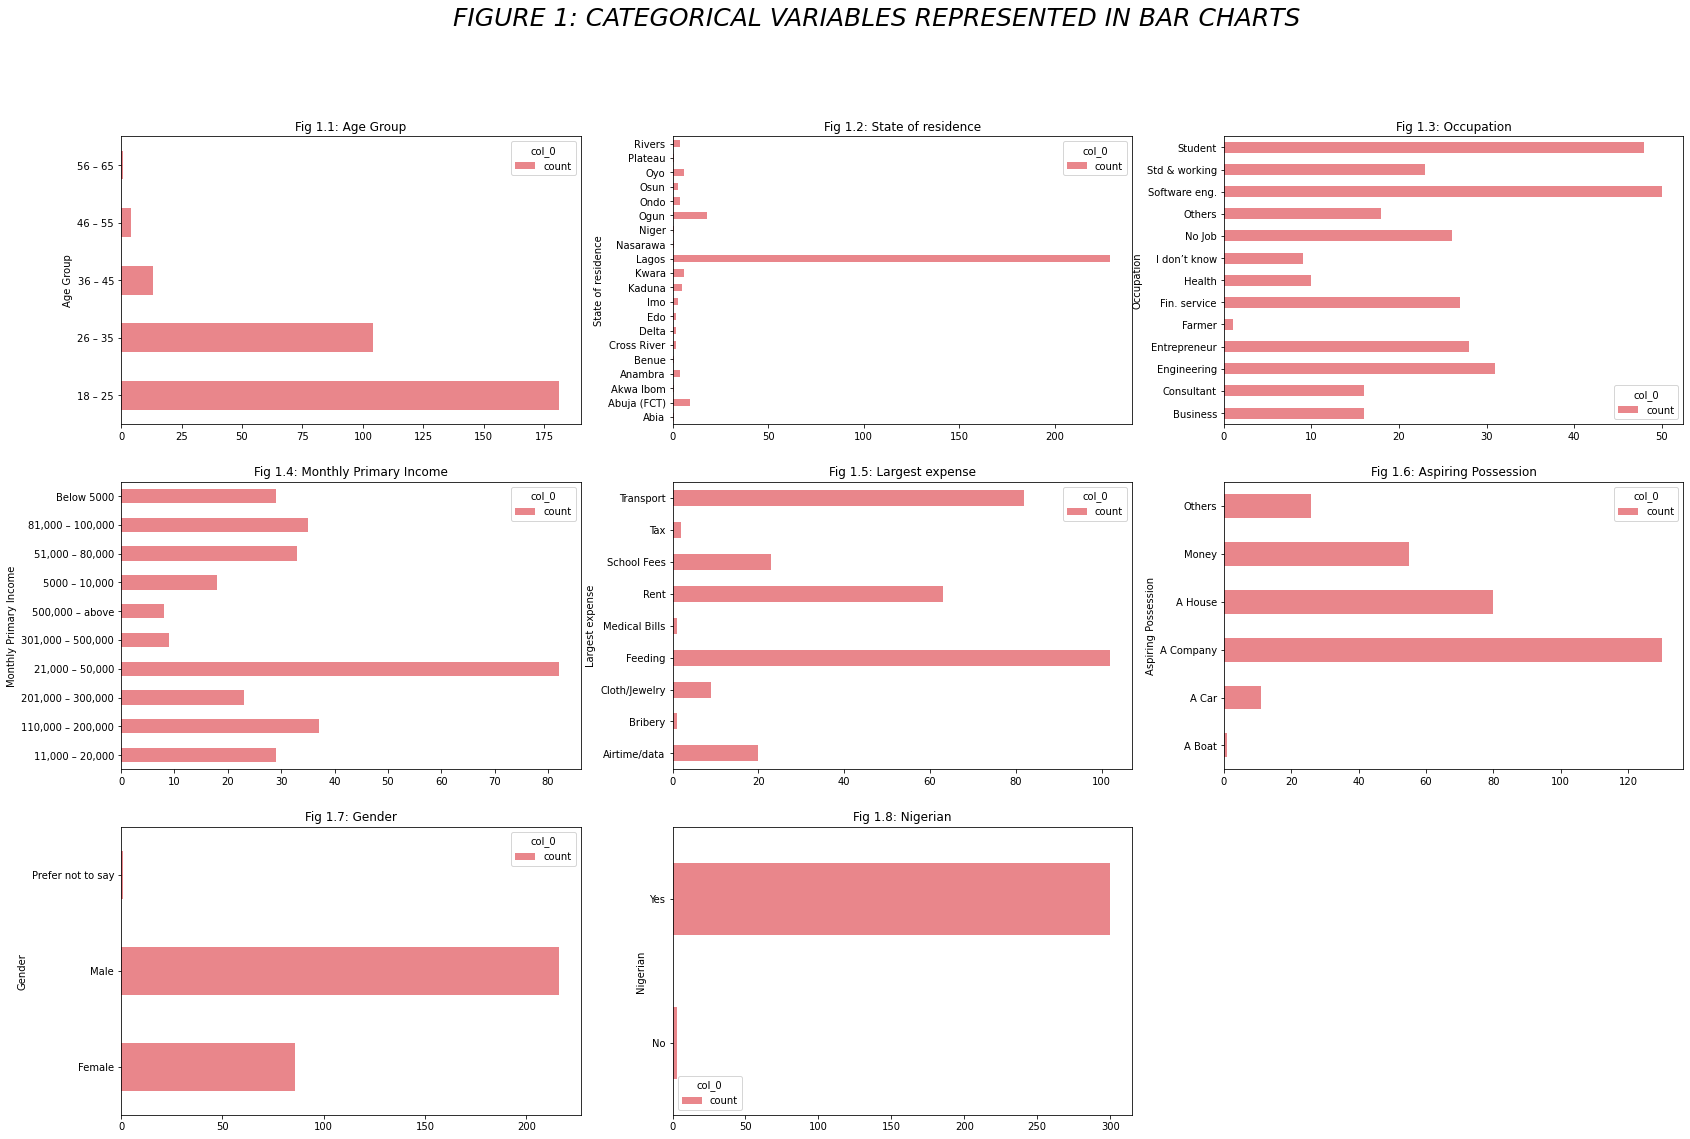

In [14]:
#defining the specifications for the figure to contain the subplots
figure, axis = plt.subplots(3, 3, figsize=(28,18))

#defining the speicification for each subplot
pd.crosstab(dataset["Age Group"], columns = "count").plot(kind="barh", color = "#e9868b", ax=axis[0,0])
pd.crosstab(dataset["State of residence"], columns = "count").plot(kind = "barh", rot = 0, color = "#e9868b", ax=axis[0,1])
pd.crosstab(dataset["Occupation"], columns = "count").plot(kind = "barh", color = "#e9868b", ax=axis[0,2])
pd.crosstab(dataset["Monthly Primary Income"], columns = "count").plot(kind = "barh", color = "#e9868b", ax=axis[1,0])
pd.crosstab(dataset["Largest expense"], columns = "count").plot(kind="barh", color="#e9868b", ax=axis[1,1])
pd.crosstab(dataset["Aspiring Possession"], columns = "count").plot(kind="barh", color="#e9868b", ax=axis[1,2])
pd.crosstab(dataset["Gender"], columns = "count").plot(kind="barh", color="#e9868b", ax=axis[2,0])
pd.crosstab(dataset["Nigerian"], columns = "count").plot(kind="barh", color="#e9868b", ax=axis[2,1])

#asking for the last subplot zone to be blank since there is no chart fitted there
axis[2,2].axis("off")

#setting titles for each of the charts
axis[0,0].set_title("Fig 1.1: Age Group")
axis[0,1].set_title("Fig 1.2: State of residence")
axis[0,2].set_title("Fig 1.3: Occupation")
axis[1,0].set_title("Fig 1.4: Monthly Primary Income")
axis[1,1].set_title("Fig 1.5: Largest expense")
axis[1,2].set_title("Fig 1.6: Aspiring Possession")
axis[2,0].set_title("Fig 1.7: Gender")
axis[2,1].set_title("Fig 1.8: Nigerian")

#setting the main title of the figure
plt.suptitle("FIGURE 1: CATEGORICAL VARIABLES REPRESENTED IN BAR CHARTS", fontsize=25, fontstyle="oblique")

From Figure 1 above, we can make the following deductions:


1.   Most of the respondents are Nigerians (Fig 1.8), young and aged less than 36 years (Fig 1.1), and they were also more of males than females (Fig 1.7)

2.   Most live in Lagos state, Nigeria (Fig 1.2), and had various occupations but mostly either Software engineers, students, or Engineers (Fig 1.3)

3.   About money matters 😀, the real reason for this analysis; Up to one-quarter of them earn only between 21,000-50,000 per month from their primary source of income (Figure 1.4), with only less than 10 of them (barely 3%) earning above 500.
To further understand this:


> *   These respondents spend most of their income on feeding, transportation or rent (Fig 1.5) and yet acquire to own a house or company (Fig 1.6)


> *   Just a few of them think that medical expense, taxations or bribery serve as the most source of expenditure (Fig 1.5)

For further exploration of what is happening here, I explored the accompanying data file in the project below so that we can have alook at what some food items actually cost in Nigeria.





In [15]:
#Loading the second data file

food_price = pd.read_excel("/content/drive/MyDrive/My pythons/Nig Demo data/FoodObservationData.xlsx")
food_price

,State,State Name,Item Name,Scale,Units,2016 March,2017 March,2018 March,2019 March
0,NG,Nigeria,Rice local sold loose,units,1kg,200.429963,308.867810,283.567685,280.797321
1,NG,Nigeria,Onion bulb,units,1kg,190.804431,246.948910,235.306506,231.905619
2,NG,Nigeria,"Gari yellow,sold loose",units,1kg,166.396493,302.047239,243.992510,184.182166
3,NG,Nigeria,"Evaporated tinned milk(peak), 170g",units,1 unit,139.164720,177.054054,187.610212,188.229615
4,NG,Nigeria,Bread sliced 500g,units,1 loaf,259.291413,297.505882,305.878268,299.977923
5,NG,Nigeria,"Beans brown,sold loose",units,1kg,240.914433,353.277237,395.343034,368.073977
6,NG,Nigeria,Vegetable oil:1 bottle,units,1Ltr,348.840000,513.420000,533.453244,506.646564
7,NG,Nigeria,Palm oil: 1 bottle,units,1Ltr,327.840000,442.040000,492.132941,460.324406
8,NG,Nigeria,Titus:frozen,units,1kg,712.193643,774.893522,905.757578,945.656213
9,NG,Nigeria,Yam tuber,units,1kg,156.585849,255.864752,254.509000,200.882499


The food price data file above shows the basic cost food items per month and for a better view and interpretation I went on to generate a line chart to visualise the trend of these food items over the years.

See below

In [16]:
#Shortening some value names
food_price["Item Name"]= food_price["Item Name"].replace("Rice local sold loose", "Local rice")
food_price["Item Name"]= food_price["Item Name"].replace("Evaporated tinned milk(peak), 170g", "Peak milk")
food_price["Item Name"]= food_price["Item Name"].replace("Gari yellow,sold loose", "Yellow Garri")
food_price["Item Name"]= food_price["Item Name"].replace("Bread sliced 500g", "Sliced Bread")
food_price["Item Name"]= food_price["Item Name"].replace("Beans brown,sold loose", "Brown Beans")
food_price["Item Name"]= food_price["Item Name"].replace("Rice,imported high quality sold loose", "Imported Rice")
food_price["Item Name"]= food_price["Item Name"].replace("Vegetable oil:1 bottle", "Veg oil")

Text(0.5, 1.0, 'FIGURE 2: TREND LINE OF FOOD STUFF PRICES 2016-2019')

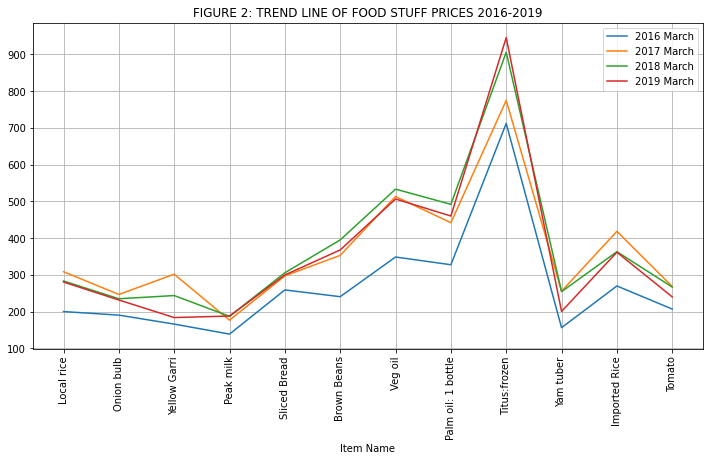

In [17]:
#Specifying details for plotting and customising the line graph
food_price.plot(x = "Item Name", figsize=(12,6)) #details for plotting and figure size
plt.grid(b=True, which="both") #details for visualising grid lines in graph
plt.xticks(food_price.index, food_price["Item Name"], rotation=90) #details for the x-ticks
plt.title("FIGURE 2: TREND LINE OF FOOD STUFF PRICES 2016-2019") #details for the figure title

**To start with,**

Figure 2 showed that life was better in 2016 than the following years

But having a further look, Fish and oil have perpetually been a wonderful headache for most Nigerians ... like Fish ooo!

But a closer look explains why most income is spent on Feeding, since most Nigerians earn between 21,000-50,000 per month

Now imagine how much is spent on one meal if the price of food items are this high.

And in a month, we are supposed to have three-squared meals for each of the approximate 28 days of the month.

Now imagine what happens to an average household of 5 or more.


---


Okay ... 

Let's drive on to see what the other variables look like.

Text(0.5, 0.98, 'FIGURE 3: CATEGORICAL VARIABLES REPRESENTED IN PIE CHARTS')

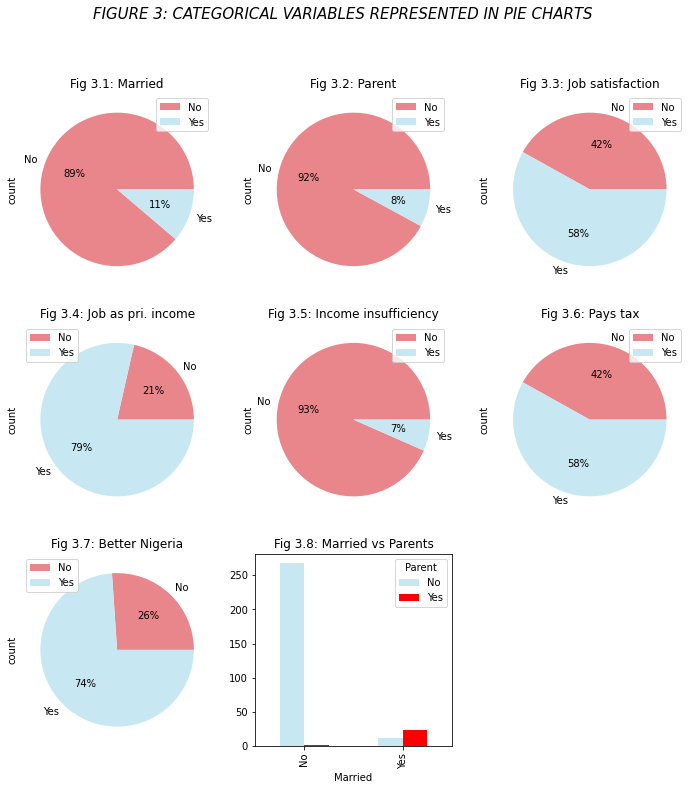

In [18]:
#Specifying the figure details
figure, axis = plt.subplots(3, 3, figsize=(12,12))

#Specifying the various subplots' details
pd.crosstab(dataset["Married"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[0,0], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Parent"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[0,1], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Job satisfaction"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[0,2], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Job as primary income"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[1,0], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Income sufficiency"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[1,1], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Pays tax"], columns = "count").plot(kind="pie", subplots=True, autopct = '%.0f%%', ax=axis[1,2], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Better Nigeria"], columns = "count").plot(kind="pie", subplots=True, autopct = '%.0f%%', ax=axis[2,0], colors=["#e9868b", "#C7E8F3"])
pd.crosstab(dataset["Married"], columns=dataset["Parent"]).plot(kind="bar", ax=axis[2,1], color=["#C7E8F3", "red"])

#Specifying the title of each subplot
axis[0,0].set_title("Fig 3.1: Married")
axis[0,1].set_title("Fig 3.2: Parent")
axis[0,2].set_title("Fig 3.3: Job satisfaction")
axis[1,0].set_title("Fig 3.4: Job as pri. income")
axis[1,1].set_title("Fig 3.5: Income insufficiency")
axis[1,2].set_title("Fig 3.6: Pays tax")
axis[2,0].set_title("Fig 3.7: Better Nigeria")
axis[2,1].set_title("Fig 3.8: Married vs Parents")

#Turning off the empty subplot with no chart specifications
axis[2, 2].axis('off')

#Specifying the main title of the image
plt.suptitle("FIGURE 3: CATEGORICAL VARIABLES REPRESENTED IN PIE CHARTS", fontsize=15, fontstyle="oblique")


*   Fig 3.1 showed that only 11% are married while 8% are parenting (Fig 3.2); to further explain the expected relationship in this, I generated the accompanying multiple bar chart (Fig 3.8) which showed that all parenting respondents are married except for one.


*   About their jobs: more than half (Fig 3.3) were satisfied with their jobs and that job serves as the primary income for more than three-quarter (Fig 3.4), but sadly, only 7% were satisfied with their jobs (Fig 3.5).



*   In the next section, we will explore to see how this job satosfaction is related to their various occupations.


*   Lastly, it is encouraging to see that almost three-quarter (Fig 3.7) have really good hope for the country.



---

So, for some other variables, I noticed that I will need to do a bit more to *make them make more sense* beyond jsut presenting them as above, so I did what I have now learnt to do 😀

So let me walk you through it



---

At the first exploration of their area of residence, I noticed a pattern where city was specified differently from urban and some people simply said they don't know.

So I did a little coding here and there and recoded into a new column in such a way that those who answered "city" will now be merged with those who answered "urban", while those who said they don't know where they are were taken to "rural". 🤷

After I was done I presented the plots of the old and new variables(columns) as subplots in one image for easy visualisation.

Text(0.5, 0.98, 'FIGURE 4: AREA OF RESIDENCE - GROUPED AND UNGROUPED')

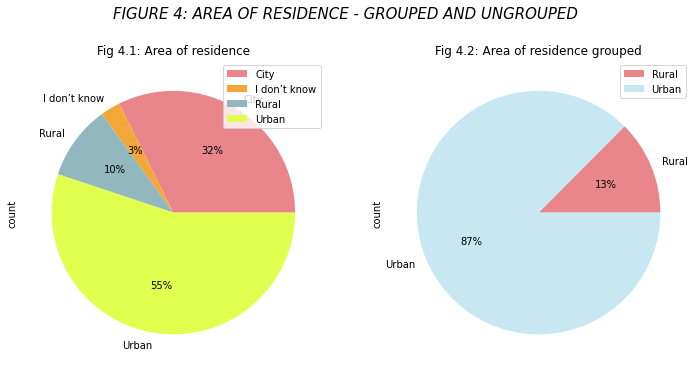

In [19]:
#Specifying the image details
figure, axis = plt.subplots(1, 2, figsize=(12,6))

#specifying the first subplot which is from the original variable
pd.crosstab(dataset["Area of residence"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[0],\
                                                                  colors=["#e9868b", "#f3a738", "#93b7be", "#e0ff4f"])
#specifying for the creation of a new column from the existing column
dataset["new Area of residence"] = 0
dataset["new Area of residence"] = dataset["Area of residence"].apply(lambda x: "Urban" if x == "City" or x == "Urban" else "Rural")

#Specifying the second subplot which is the new variable
pd.crosstab(dataset["new Area of residence"], columns = "count").plot(kind = "pie", subplots = True, autopct = '%.0f%%', ax=axis[1], colors=["#e9868b", "#C7E8F3"])

#specifying the titles of the respective subplots
axis[0].set_title("Fig 4.1: Area of residence")
axis[1].set_title("Fig 4.2: Area of residence grouped")

#specifying the title of the main image
plt.suptitle("FIGURE 4: AREA OF RESIDENCE - GROUPED AND UNGROUPED", fontsize=15, fontstyle="oblique")

From Figure 4 above, it can be easily seen that most people were living in an urban area.



---

The next exploration was on the respective sources of their secondary income.

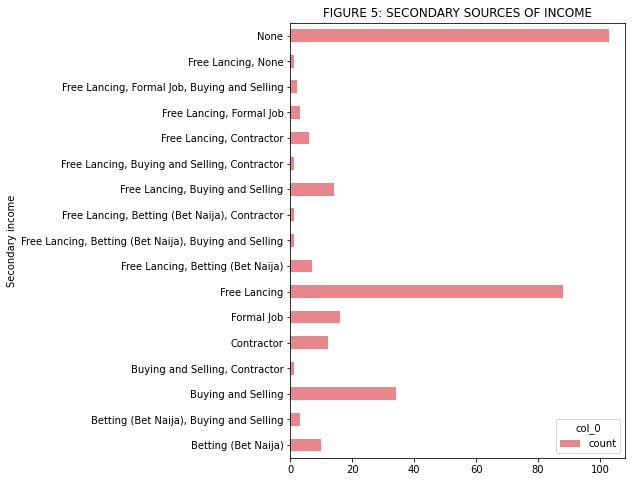

In [20]:
pd.crosstab(dataset["Secondary income"], columns = "count").plot(kind="barh", color="#e9868b", figsize=(6,8), title="FIGURE 5: SECONDARY SOURCES OF INCOME")

Figure 5 above showed that although majority had no secondary source of income, those that had have various types, with many of them having more than one source.

This leaves the interpretation a bit messy with questions like:



> *   What are the exact unique sources of secondary income?


> *   Exactly how many people are using a particular source as their income, whether alone or in combination?



To answer these, I had to do some coding here and there which includes:



> *   splitting the values from the comma


> *   performing a onhot encoding kind of encoding


> *   melting the new new variables as one set


> *   Plotting the new variables set as a figure

So let me walk you through my codes as always 😀





Text(0.5, 0.98, 'FIGURE 6: SOURCE OF SECONDARY INCOME, GROUPED AN UNGROUPED')

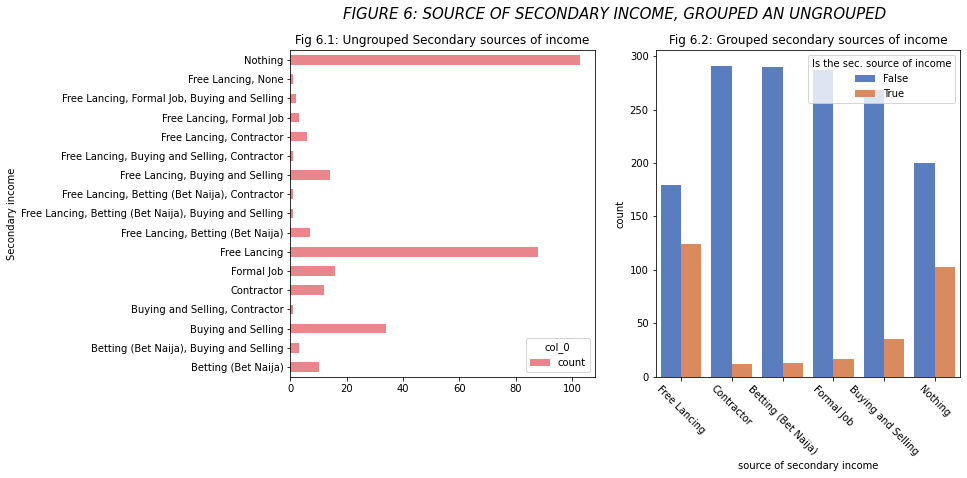

In [21]:
# Splitting the column
dataset["Secondary income"]= dataset["Secondary income"].replace("None", "Nothing") #first replacing the "none" answer in the dataset as "nothing"
data_split1 = dataset["Secondary income"].str.split(", ", expand=True) #giving specifications of where to split from

# Creating a list of the unique values from the data_split1 file
# I first converted the unique values to set so that it will remove duplicate values ...
#... and then converted it back to list which is the actual form that I will be using
sec_income_unique_set = set(data_split1[0].unique().tolist() + data_split1[1].unique().tolist() + data_split1[2].unique().tolist())
sec_income_unique_list = list(sec_income_unique_set)

# Performing the onehot encoding while keeping the values as bool for easy interpretation in the graph
data = dataset.join(dataset["Secondary income"].str.get_dummies(sep=",")
    .reindex(sec_income_unique_list, axis=1, fill_value=0).astype(bool))

# Now performing the melt which is like telling python the set of columns you want it consider as one 
# I started with calling a list of those variables and converting them to a dataframe
# After which I used the melt function to "marry" them
sec_income_source = data.loc[:,["Free Lancing", "Contractor", "Betting (Bet Naija)", "Formal Job", "Buying and Selling", "Nothing"]]
sec_income_source_df = pd.DataFrame(sec_income_source)
sec_income_source1 = sec_income_source.melt(var_name="source of secondary income", value_name="Is the sec. source of income")

#Now specifying the details for my plot
figure, axis = plt.subplots(1, 2, figsize=(12,6))

pd.crosstab(dataset["Secondary income"], columns = "count").plot(kind="barh", color="#e9868b",ax=axis[0]) #details for original column

#specifying the details for the second subplot alongside its customisation details
sns.countplot(x="source of secondary income", hue="Is the sec. source of income", data=sec_income_source1, ax=axis[1], palette="muted") 
locs, labels = plt.xticks()
plt.setp(labels, rotation=315)


#specifying the titles of the respective subplots
axis[0].set_title("Fig 6.1: Ungrouped Secondary sources of income")
axis[1].set_title("Fig 6.2: Grouped secondary sources of income")

# specifying the title of the main image
plt.suptitle("FIGURE 6: SOURCE OF SECONDARY INCOME, GROUPED AN UNGROUPED", fontsize=15, fontstyle="oblique")

Now, it's easier to see that while Figure 6.1 was saying that most of them were doing nothing as their secondary source of income, in reality, they were more of freelancers (Figure 6.2) than not doing anything.

Other secondary hustles include "buying and selling", "betting", "formal jobs", and "contractor jobs".

You know that if I had decided to merge those contractors as freelancers, the figure of freelancers will keep boosting again right ... another way to prove that they were predominantly freelancers in their secondary hustling nature than nothing.

**FOR THE RESPONDENTS' THOUGHTS ABOUT THE GOVERNMENT**

---

At the time of this analysis, I have not learnt how to analyse these super wordy data.

I have heard of word cloud but I have not wrapped my head around it so I am just going to skip its discussion for now.

But trust me to deliver it as a separate discussion file or post, as soon as I learn it.

In [22]:
# Having a look at the thoughts about the government
pd.crosstab(dataset["Thought about the government"], columns = "count")

col_0,count
Thought about the government,
"""One man business""",1
....,1
A bunch of corrupt thieves.,1
"A bunch of people who see their primary responsibility as secondary. Some mean well, but others and greedy Nigerians wouldn't let them work.",1
"A government full of greedy people, but then, so are most Nigerians",1
...,...
unconcerned and focusless about innovative ways to attend to the present and future needs of her citizens,1
unscrupulous,1
useless,1




---


**So let's have a quick look at those two numerical columns in our dataset**

In [23]:
dataset.describe()

,Cumulative secondary income,Monthly expenditure
count,3.030000e+02,3.030000e+02
mean,6.605795e+07,1.650782e+08
std,8.110941e+08,2.872421e+09
min,0.000000e+00,0.000000e+00
25%,5.000000e+01,2.000000e+04
50%,1.500000e+04,4.700000e+04
75%,5.000000e+04,8.000000e+04
max,1.000000e+10,5.000000e+10


From the table above, we can see that their is a wide range in both the "cumulative secondary income" and the "monthly expenditure" of the respondents; a reality or an error?

Well let me visualise this for you to understand better; see below 👇

Text(0.5, 0.98, 'FIGURE 7: BOXPLOTS OF THE NUMERICAL VARIABLES IN THE DATASET')

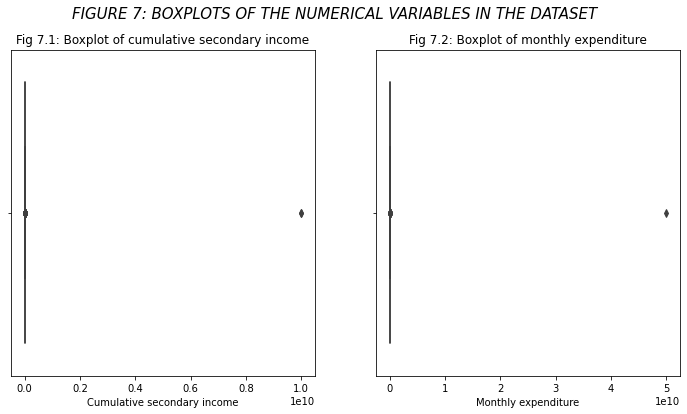

In [24]:
#specifying for the details of the plots
figure, axis = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(x=dataset["Cumulative secondary income"], ax=axis[0]) #boxplot details for cumulative secondary income
sns.boxplot(x=dataset["Monthly expenditure"], ax=axis[1]) #boxplot details for mmonthly expenditure

#specifying the titles of the respective subplots
axis[0].set_title("Fig 7.1: Boxplot of cumulative secondary income")
axis[1].set_title("Fig 7.2: Boxplot of monthly expenditure")

# specifying the title of the main image
plt.suptitle("FIGURE 7: BOXPLOTS OF THE NUMERICAL VARIABLES IN THE DATASET", fontsize=15, fontstyle="oblique")

Hmmm!

I requested for a boxplot and what did we get in the subplots in Figure 7: a line and a dot! 
Isn't that wonderful 😀

Well, this is what happened: This data has an outlier that is dealing with these columns. Those outliers are represented as a plot at the right extreme of each plot there.

The outlier is so pronounced that if there are lower outliers are the left extreme, it cannot be appreciated.

Furthermore, the outlier was also too pronounced that it compacted the majority of the findings as a line.

So, I tried to perform some normalisation and see what it will look like.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, 'FIGURE 8: GRAPHICAL DISTRIBUTION OF CUMULATIVE MONTHLY INCOMEAND MONTHLY EXPENDITURE, BEFORE AND AFTER NORMALIZATION')

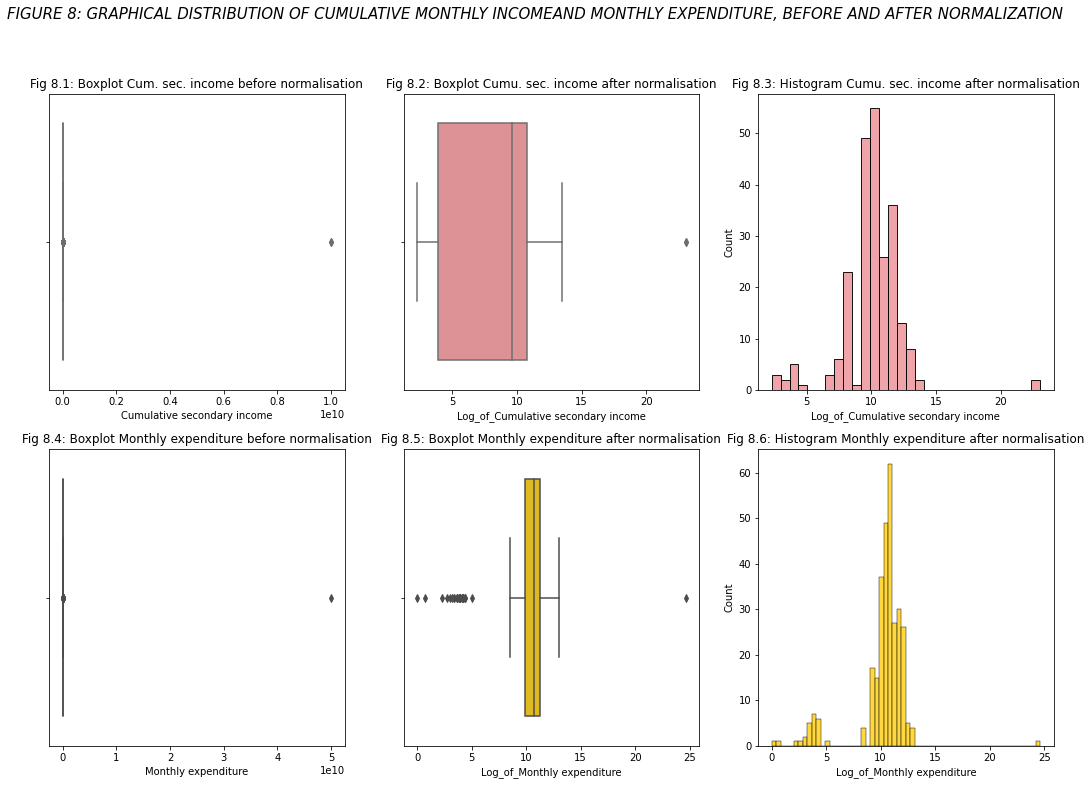

In [25]:
#Normalising both columns using log
dataset["Log_of_Cumulative secondary income"] = [np.log(x) for x in dataset["Cumulative secondary income"]]
dataset["Log_of_Monthly expenditure"] = [np.log(x) for x in dataset["Monthly expenditure"]]

#specifying for a new plot to visualise the boxplot and histogram of the columns before and after the normalisation
figure, axis = plt.subplots(2, 3, figsize=(18,12))
cse = dataset["Log_of_Cumulative secondary income"]
me = dataset["Log_of_Monthly expenditure"]

#specifying the details of each subplot alongside their titles
sns.boxplot(x=dataset["Cumulative secondary income"], ax=axis[0,0],color="#e9868b")\
.set(title= "Fig 8.1: Boxplot Cum. sec. income before normalisation")
sns.boxplot(x=dataset["Monthly expenditure"], ax=axis[1,0], color="#ffcc00")\
.set(title= "Fig 8.4: Boxplot Monthly expenditure before normalisation")
sns.boxplot(x=cse, ax=axis[0,1], color ="#e9868b")\
.set(title= "Fig 8.2: Boxplot Cumu. sec. income after normalisation")
sns.boxplot(x=me, ax=axis[1,1], color = "#ffcc00")\
.set(title= "Fig 8.5: Boxplot Monthly expenditure after normalisation")
sns.histplot(cse, ax=axis[0,2], color="#e9868b")\
.set(title= "Fig 8.3: Histogram Cumu. sec. income after normalisation")
sns.histplot(me, ax=axis[1,2], color="#ffcc00")\
.set(title= "Fig 8.6: Histogram Monthly expenditure after normalisation")

#specifying the main title of the main image
plt.suptitle("FIGURE 8: GRAPHICAL DISTRIBUTION OF CUMULATIVE MONTHLY INCOME\
AND MONTHLY EXPENDITURE, BEFORE AND AFTER NORMALIZATION", fontsize=15, fontstyle="oblique")

Now we can appreciate that the new columns are better distributed enough to visualise the boxes and the histogram, even though the data are still skewed by some resulting outliers.


---

To further re-examine the old and new numerical columns, I generated the table below and it shows us that although the data is now normalised from the fugures in Figure 8, there is no finite mean nor minimum values, so it may be hard to employ these columns in statistical tests.

In [26]:
# Re-examining the new and old numerical variables in the dataset
dataset.describe()

,Cumulative secondary income,Monthly expenditure,Log_of_Cumulative secondary income,Log_of_Monthly expenditure
count,3.030000e+02,3.030000e+02,303.000000,303.000000
mean,6.605795e+07,1.650782e+08,-inf,-inf
std,8.110941e+08,2.872421e+09,NaN,NaN
min,0.000000e+00,0.000000e+00,-inf,-inf
25%,5.000000e+01,2.000000e+04,3.912023,9.903488
50%,1.500000e+04,4.700000e+04,9.615805,10.757903
75%,5.000000e+04,8.000000e+04,10.819778,11.289782
max,1.000000e+10,5.000000e+10,23.025851,24.635289




---

***NOW THAT WE HAVE SUCCESSFULLY DESCRIBED EACH COLUMN IN THE DATASET, THE NEXT SECTION WILL EXPLORE PATTERNS BETWEEN THE VARIABLES AND ATTEMPT TO MAKE SOME DEDUCTIONS***

# Exploring patterns

In this section, I will use graphs to visualise the relationship between the variables in this dataset.

I have intentionally grouped some selected variables as socio-demographic variables, they include: gender, age, marital status, parenting, area of residence, and occupation.

So let's make it happen.


---

Furthermore, for easy interpration, I will be recoding some variables into new variables with fewer unique values and more tangible cases/value. The new variables will then be used for this section.

Such values include: gender, age, and occupation.

This is done below:

In [27]:
#Recoding new variable for gender using lambda
dataset["new Gender"] = 0
dataset["new Gender"] = dataset["Gender"].apply(lambda x: "Female" if x == "Female" or x == "Prefer not to say" else "Male")
print("new Gender values:")
print(dataset["new Gender"].unique())
print("\n")

#Recoding new variable for age groups using lists
original_age_group = ['18 – 25', '36 – 45', '26 – 35', '56 – 65', '46 – 55']
new_Age_group = ["18-25", "Above 35", "26-35", "Above 35", "Above 35"]
dataset["new Age Group"] = dataset["Age Group"].replace(original_age_group, new_Age_group)
print("new Age groups:")
print(dataset["new Age Group"].unique())
print("\n")

#Recoding new variable for occupation using lists
original_occupation = ['No Job', 'Fin. service', 'Business', 'Engineering', 'Consultant',
       'Software eng.', 'Student', 'Entrepreneur', 'I don’t know',
       'Health', 'Std & working', 'Farmer', 'Others']
new_occupation = ["None", "Professional", "Business", "Professional", "Professional", "Professional", "None",
                  "Business", "None", "Professional", "Business", "Others", "Others"]
dataset["new Occupation"] = dataset["Occupation"].replace(original_occupation, new_occupation)
print("new occupation values:")
print(dataset["new Occupation"].unique())

new Gender values:
['Female' 'Male']


new Age groups:
['18-25' 'Above 35' '26-35']


new occupation values:
['None' 'Professional' 'Business' 'Others']




---

Now, I will use the new variables and the unchanged variables to perform the relationship explorations below:


---


**Socio-demographic variables and Job satisfaction**

Text(0.5, 0.98, 'FIGURE 9: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH JOB SATISFACTION')

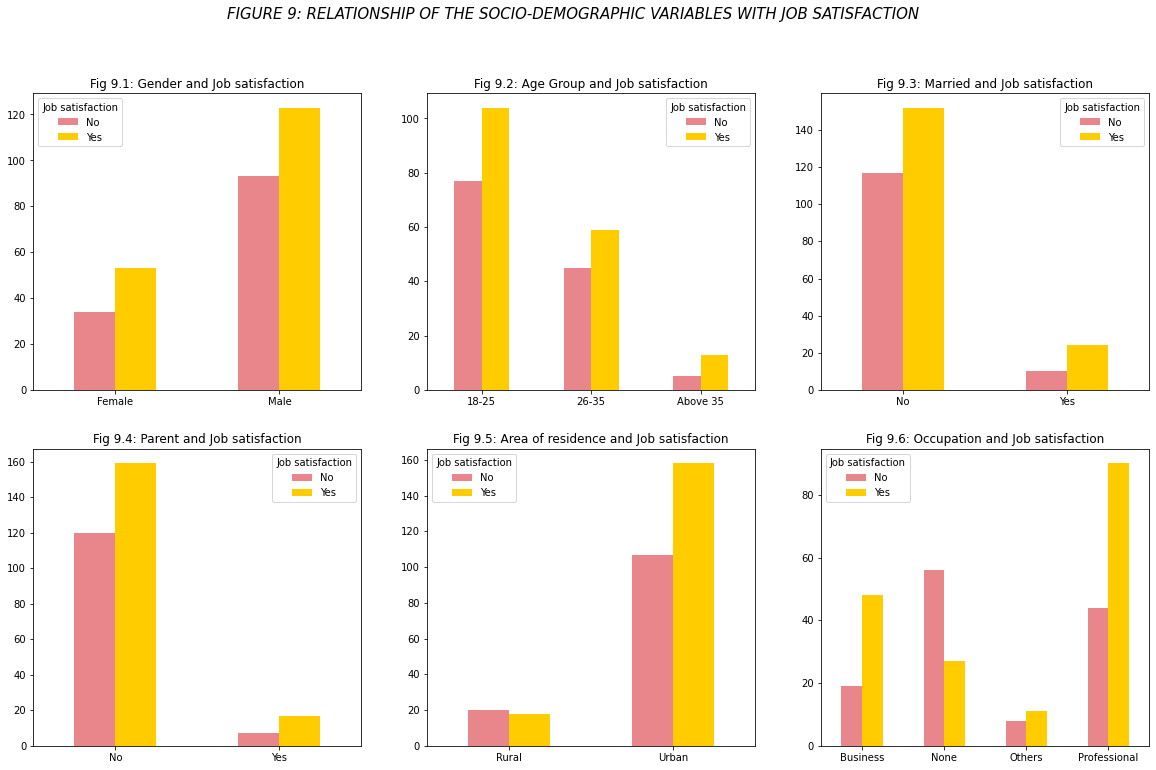

In [28]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(20,12))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Job satisfaction"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 9.1: Gender and Job satisfaction", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Job satisfaction"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 9.2: Age Group and Job satisfaction", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Job satisfaction"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 9.3: Married and Job satisfaction", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Job satisfaction"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 9.4: Parent and Job satisfaction", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Job satisfaction"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 9.5: Area of residence and Job satisfaction", ax=axis[1,1], xlabel="")
pd.crosstab(dataset["new Occupation"], columns=dataset["Job satisfaction"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 9.6: Occupation and Job satisfaction", ax=axis[1,2], xlabel="")

#specifying the title of the main image
plt.suptitle("FIGURE 9: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH JOB SATISFACTION", fontsize=15, fontstyle="oblique")

From Figure 9 above, it can be seen that most groups (except for those in rural (Figure 9.5) area and those who are not working (Figure 9.6)), are satisfied with their jobs regardless of the grouping variable.

**Socio-demographic variables and occupation**

Text(0.5, 0.98, 'FIGURE10: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH OCCUPATION')

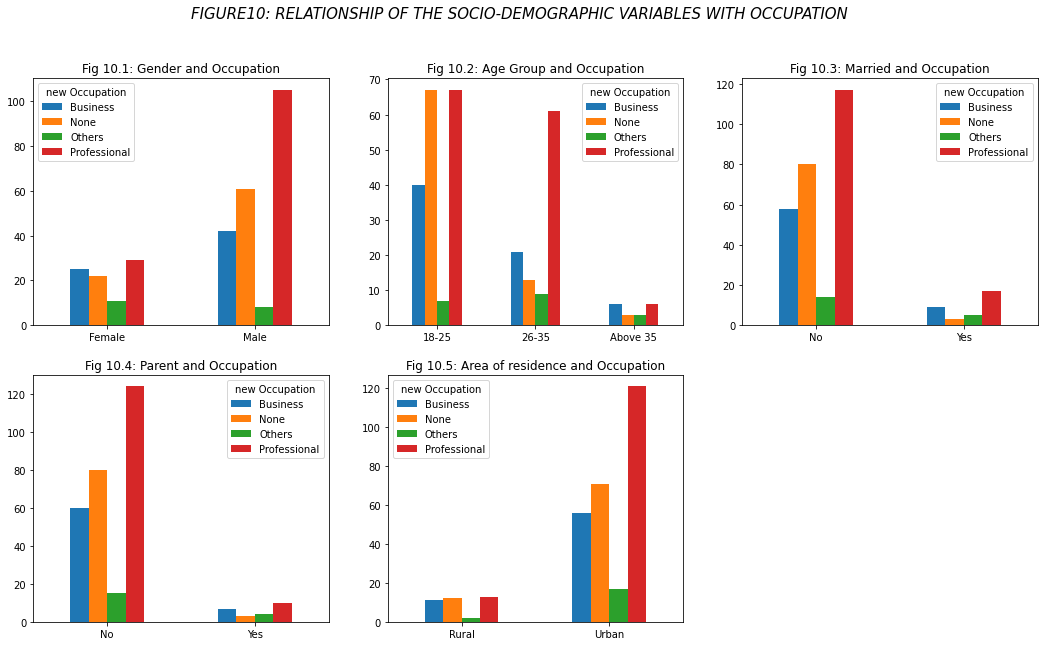

In [29]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(18,10))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["new Occupation"]).\
plot(kind="bar", rot=0, title="Fig 10.1: Gender and Occupation", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["new Occupation"]).\
plot(kind="bar", rot=0, title="Fig 10.2: Age Group and Occupation", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["new Occupation"]).\
plot(kind="bar", rot=0, title="Fig 10.3: Married and Occupation", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["new Occupation"]).\
plot(kind="bar", rot=0, title="Fig 10.4: Parent and Occupation", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["new Occupation"]).\
plot(kind="bar", rot=0, title="Fig 10.5: Area of residence and Occupation", ax=axis[1,1], xlabel="")

#Turning off the empty subplot
axis[1, 2].axis('off')

#specifying the title of the main image
plt.suptitle("FIGURE10: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH OCCUPATION", fontsize=15, fontstyle="oblique")

Figure 10 tells about their occupations.

*   About their gender, more males are professionals than other jobs, while the same is seen for females, the gap between females who are professionals and females in other jobs is not wide.

*   With respect to their age groups, as expected, those who are unemployed are younger while other jobs are almost equally distributed.


*   Furthermore, most professionals were living in the urban areas.

**Socio-demographic variables and Monthly primary income**

Text(0.5, 0.98, 'FIGURE 11: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH MONTHLY PRIMARY INCOME')

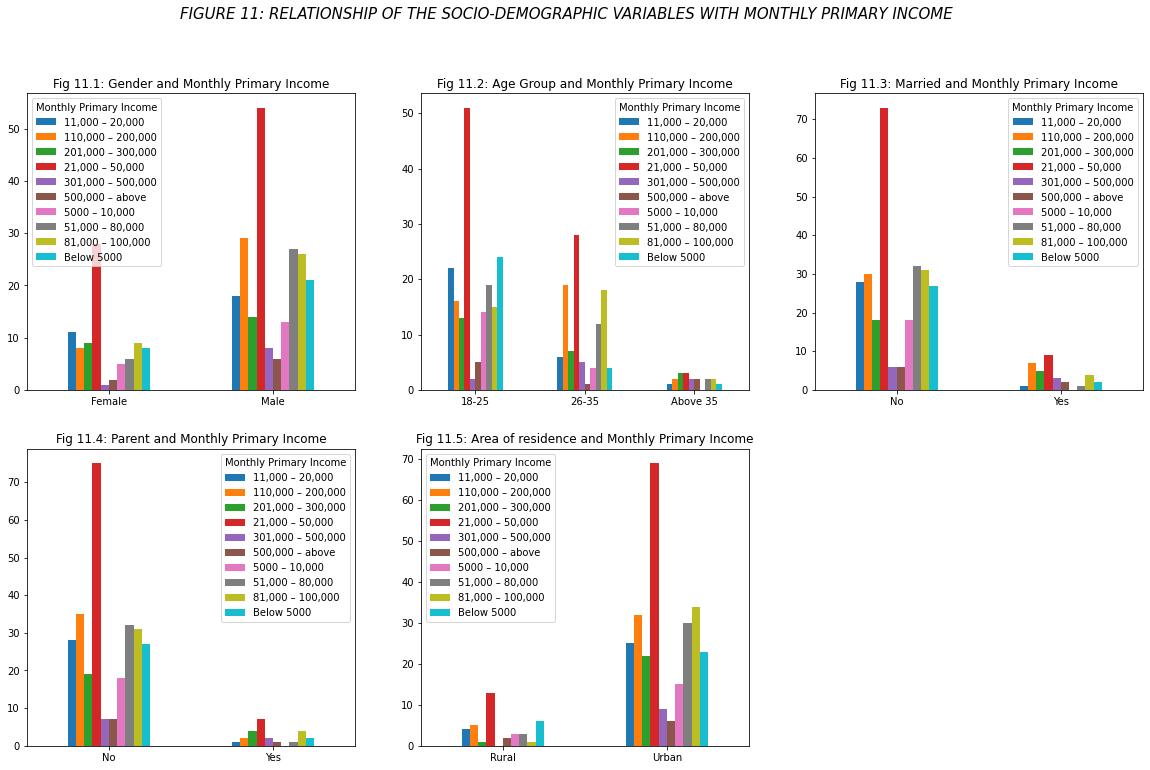

In [30]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(20,12))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Monthly Primary Income"]).\
plot(kind="bar", rot=0, title="Fig 11.1: Gender and Monthly Primary Income", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Monthly Primary Income"]).\
plot(kind="bar", rot=0, title="Fig 11.2: Age Group and Monthly Primary Income", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Monthly Primary Income"]).\
plot(kind="bar", rot=0, title="Fig 11.3: Married and Monthly Primary Income", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Monthly Primary Income"]).\
plot(kind="bar", rot=0, title="Fig 11.4: Parent and Monthly Primary Income", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Monthly Primary Income"]).\
plot(kind="bar", rot=0, title="Fig 11.5: Area of residence and Monthly Primary Income", ax=axis[1,1], xlabel="")

#Turning off the empty subplot
axis[1, 2].axis('off')

#specifying the title of the main image
plt.suptitle("FIGURE 11: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH MONTHLY PRIMARY INCOME", fontsize=15, fontstyle="oblique")

Figure 11 shows the distribution of the monthly primary income when grouped by the socio-demographic variables.


*   A striking thing is that regardless of any group, most people were earning between 21,000-50,000. This is closely followed in most groups by 11,000-20,000 and below 5,000, 51,000-80,000, and 81,000-100,000 respectively.

*   This means that most Nigerians are really living below a primary monthly income of 100,000 NGN.



**Socio-demographic variables and Income sufficiency**

Text(0.5, 0.98, 'FIGURE 12: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH INCOME SUFFICIENCY')

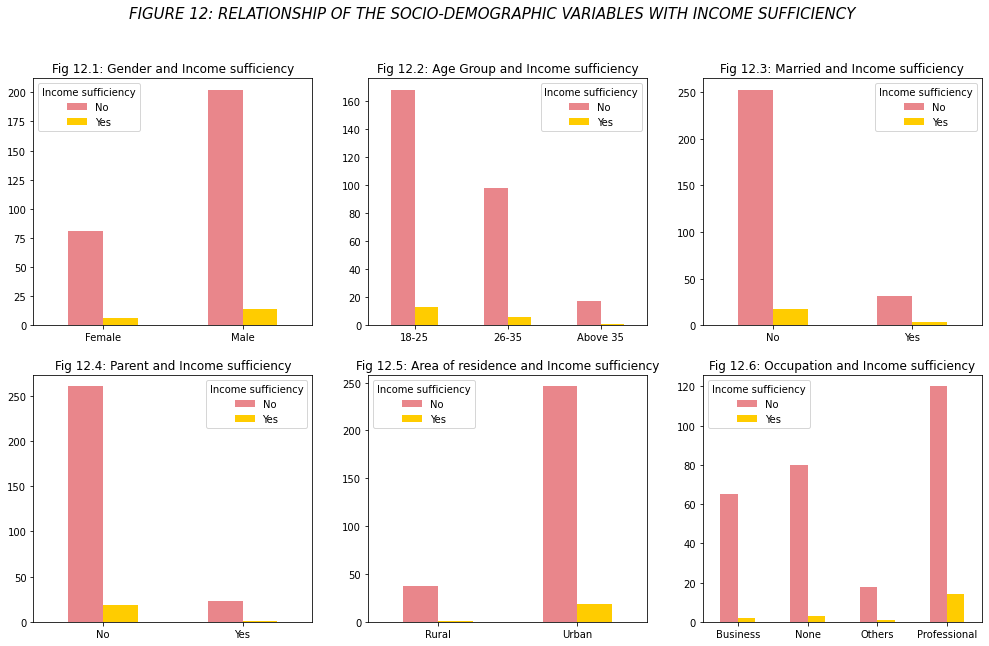

In [31]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(17,10))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Income sufficiency"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 12.1: Gender and Income sufficiency", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Income sufficiency"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 12.2: Age Group and Income sufficiency", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Income sufficiency"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 12.3: Married and Income sufficiency", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Income sufficiency"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 12.4: Parent and Income sufficiency", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Income sufficiency"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 12.5: Area of residence and Income sufficiency", ax=axis[1,1], xlabel="")
pd.crosstab(dataset["new Occupation"], columns=dataset["Income sufficiency"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 12.6: Occupation and Income sufficiency", ax=axis[1,2], xlabel="")

#specifying the title of the main image
plt.suptitle("FIGURE 12: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH INCOME SUFFICIENCY", fontsize=15, fontstyle="oblique")

In Figure 12:


*   All the groups had more people who were unsatisfied with their jobs than satisfied



**Socio-demographic variable and tax payment**

Text(0.5, 0.98, 'FIGURE 13: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH TAX PAYMENT')

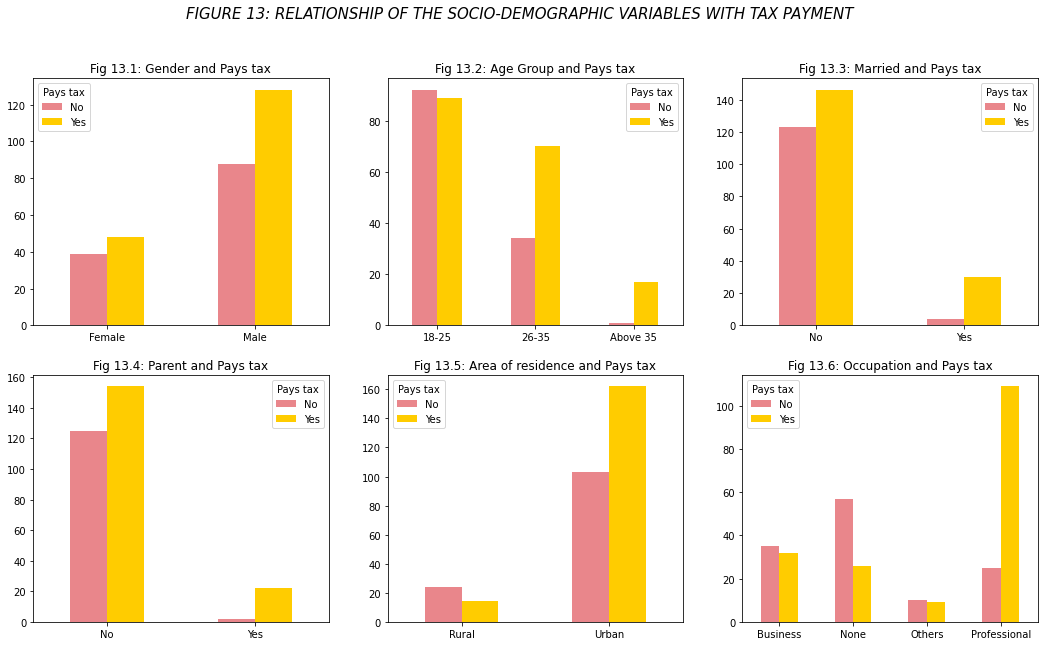

In [51]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(18,10))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Pays tax"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 13.1: Gender and Pays tax", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Pays tax"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 13.2: Age Group and Pays tax", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Pays tax"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 13.3: Married and Pays tax", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Pays tax"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 13.4: Parent and Pays tax", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Pays tax"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 13.5: Area of residence and Pays tax", ax=axis[1,1], xlabel="")
pd.crosstab(dataset["new Occupation"], columns=dataset["Pays tax"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 13.6: Occupation and Pays tax", ax=axis[1,2], xlabel="")

#specifying the title of the main image
plt.suptitle("FIGURE 13: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH TAX PAYMENT", fontsize=15, fontstyle="oblique")

Most groups in Figure 13 paid their taxes than not paying, except for those in rural areas (Fig 13.5), young (Fig 13.2) or non-professionals (Fig 13.6).

**Socio-demographic variables and Largest expense**

Text(0.5, 0.98, 'FIGURE 14: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH LARGEST EXPENSE')

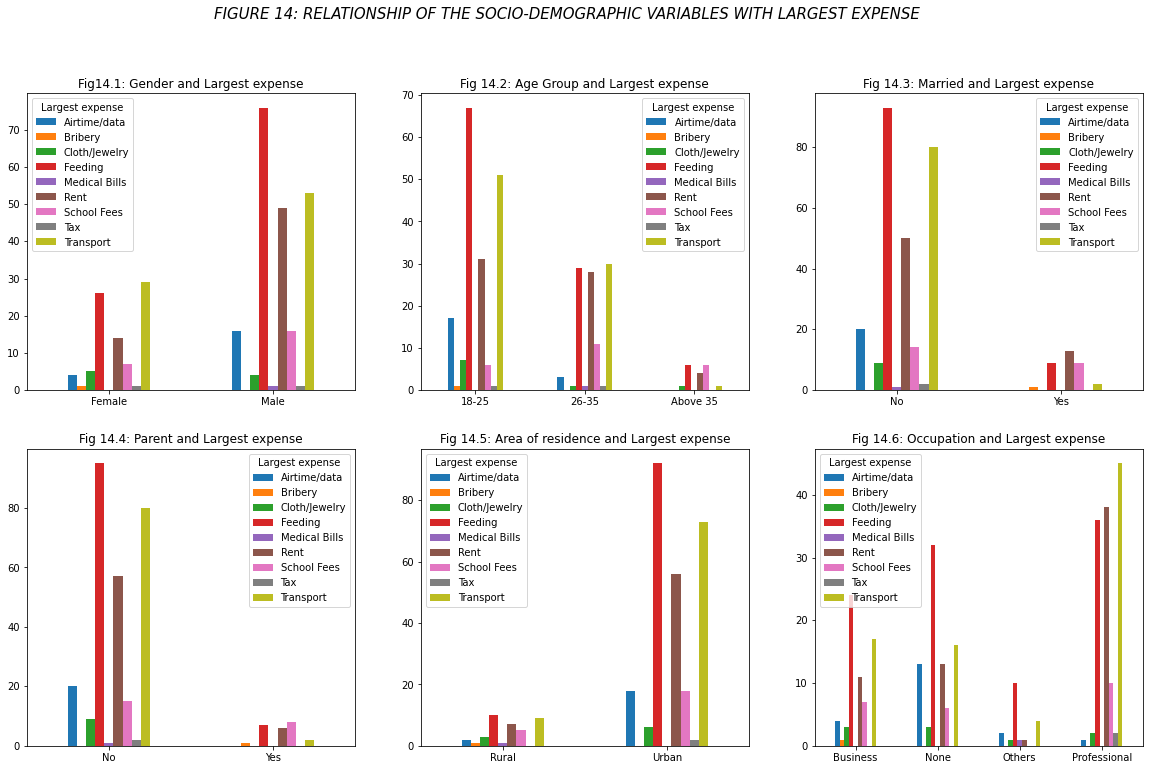

In [33]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(20,12))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Largest expense"]).\
plot(kind="bar", rot=0, title="Fig14.1: Gender and Largest expense", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Largest expense"]).\
plot(kind="bar", rot=0, title="Fig 14.2: Age Group and Largest expense", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Largest expense"]).\
plot(kind="bar", rot=0, title="Fig 14.3: Married and Largest expense", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Largest expense"]).\
plot(kind="bar", rot=0, title="Fig 14.4: Parent and Largest expense", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Largest expense"]).\
plot(kind="bar", rot=0, title="Fig 14.5: Area of residence and Largest expense", ax=axis[1,1], xlabel="")
pd.crosstab(dataset["new Occupation"], columns=dataset["Largest expense"]).\
plot(kind="bar", rot=0, title="Fig 14.6: Occupation and Largest expense", ax=axis[1,2], xlabel="")

#specifying the title of the main image
plt.suptitle("FIGURE 14: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH LARGEST EXPENSE", fontsize=15, fontstyle="oblique")

Figure 14 has an interesting pattern:

*   Feeding persistently remained as the highest expenditure for most groups except for the professional workers (Fig 14.6), the married peeps (Fig 14.3), females (Fig 14.1), mid-youths (Fig 14.2) and parents (Fig 14.4).
*   Are the professionals not eating or do they work more than they eat? ❓ 😅

*   A closer look at what is consuming the money of these "except" groups shows the following:


> *   Females spend more on transportation than feeding (Fig 14.1)


> *   The professionals spend more on transportation and rent than feeding (Fig 14.6).


> *   Those who are married or parenting consider school fees and/or rent as their major source of expense (Figs 14.3 and 14.3).


> *   The mid-youths (26-35) almost spend transportaion, feeding, and rent, but transportation ranked highest among the three (Fig 14.2).

**Socio-demographic variable and Aspiring Possession**

Text(0.5, 0.98, 'FIGURE 15: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH ASPIRING POSSESSION')

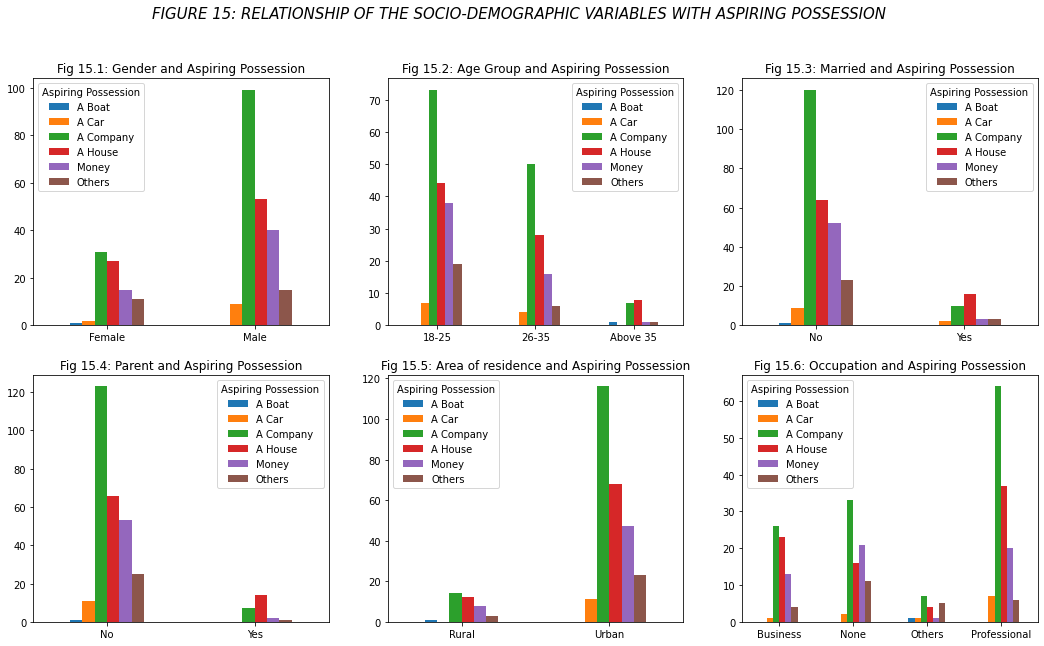

In [34]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(18,10))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Aspiring Possession"]).\
plot(kind="bar", rot=0, title="Fig 15.1: Gender and Aspiring Possession", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Aspiring Possession"]).\
plot(kind="bar", rot=0, title="Fig 15.2: Age Group and Aspiring Possession", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Aspiring Possession"]).\
plot(kind="bar", rot=0, title="Fig 15.3: Married and Aspiring Possession", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Aspiring Possession"]).\
plot(kind="bar", rot=0, title="Fig 15.4: Parent and Aspiring Possession", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Aspiring Possession"]).\
plot(kind="bar", rot=0, title="Fig 15.5: Area of residence and Aspiring Possession", ax=axis[1,1], xlabel="")
pd.crosstab(dataset["new Occupation"], columns=dataset["Aspiring Possession"]).\
plot(kind="bar", rot=0, title="Fig 15.6: Occupation and Aspiring Possession", ax=axis[1,2], xlabel="")

#specifying the title of the main image
plt.suptitle("FIGURE 15: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH ASPIRING POSSESSION", fontsize=15, fontstyle="oblique")

Figure 15 😆 😆

Do you know why I was laughing?

Everyone (not literally though) wants to have a company except those who are either married or parenting or above 35, isn't life wonderful? 😅

Okay, asides these groups who want houses more than company, can you also see that those who are working wan t money more than house, they just want that buck 😀

I think the Maslow's Hierarchy of Needs is howing off itself here.

Those who are not working are seeking for job/financial securtiy like in our data while those who are working (security achieved) or married (intimate relationship achieved) are looking for esteem needs or self-actualisation (house or company).

If you are wondering what that is, I have added the hierarchical image below.

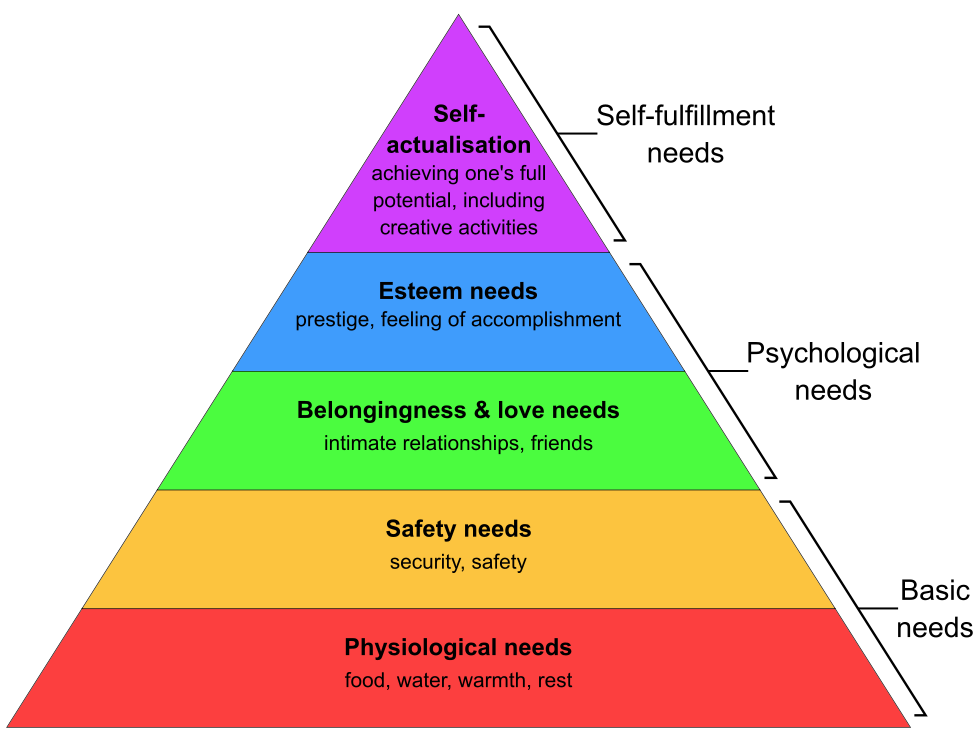

**Socio-demographic variable and Hope for better Nigeria**

Text(0.5, 0.98, 'FIGURE 16: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH BETTER NIGERIA')

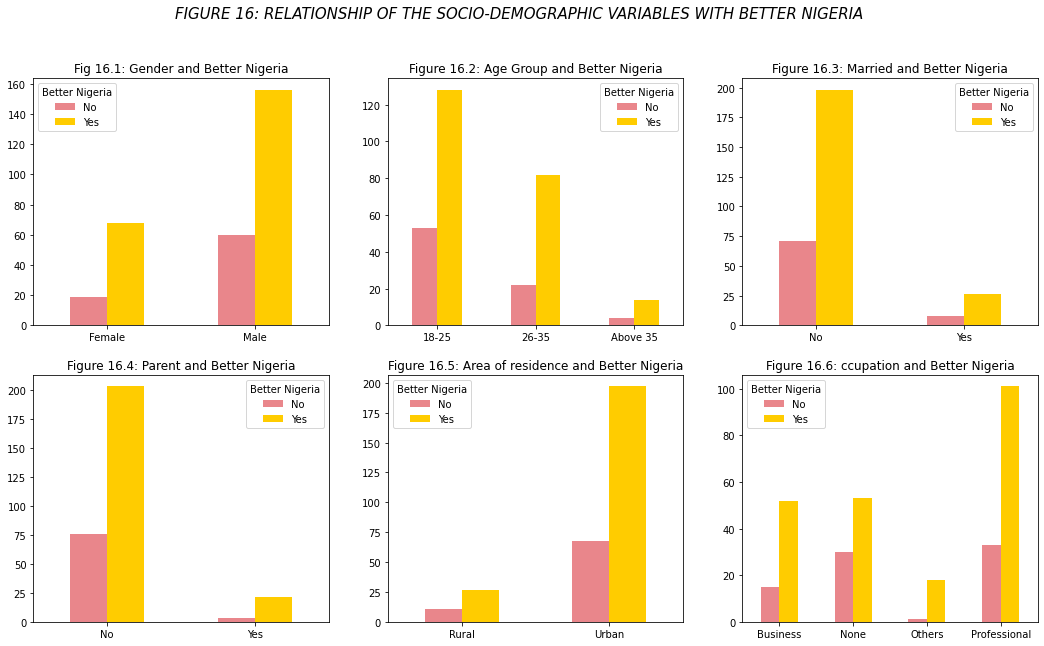

In [35]:
#specifying the plots' image details
figure, axis = plt.subplots(2, 3, figsize=(18,10))

#Specifying the details of each subplot including their customisation details and titles
pd.crosstab(dataset["new Gender"], columns=dataset["Better Nigeria"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Fig 16.1: Gender and Better Nigeria", ax=axis[0,0], xlabel="")
pd.crosstab(dataset["new Age Group"], columns=dataset["Better Nigeria"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Figure 16.2: Age Group and Better Nigeria", ax=axis[0,1], xlabel="")
pd.crosstab(dataset["Married"], columns=dataset["Better Nigeria"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Figure 16.3: Married and Better Nigeria", ax=axis[0,2], xlabel="")
pd.crosstab(dataset["Parent"], columns=dataset["Better Nigeria"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Figure 16.4: Parent and Better Nigeria", ax=axis[1,0], xlabel="")
pd.crosstab(dataset["new Area of residence"], columns=dataset["Better Nigeria"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Figure 16.5: Area of residence and Better Nigeria", ax=axis[1,1], xlabel="")
pd.crosstab(dataset["new Occupation"], columns=dataset["Better Nigeria"]).\
plot(kind="bar", color=["#e9868b","#ffcc00"], rot=0, title="Figure 16.6: ccupation and Better Nigeria", ax=axis[1,2], xlabel="")

#specifying the title of the main image
plt.suptitle("FIGURE 16: RELATIONSHIP OF THE SOCIO-DEMOGRAPHIC VARIABLES WITH BETTER NIGERIA", fontsize=15, fontstyle="oblique")

Figure 16 says that all the groups, regardless of the grouping, are hopeful (and probably praying 🙏) for Nigeria. 



---

**AND THAT BRINGS US TO THE END OF THIS SECTION WHERE WE EXPLORED RELATIONSHIPS BY VISUALISATIONS**

# Exploring relationships by performing statistical tests

In this section, we will perform some statistical tests and see if there are some figurative or statistically significant relationship between some of the variables, particularly the numerical variables in the dataset.



*   It is important to note that I did not exhaust the statistical tests that I would wish to perform in this data such as Chi-square and ANOVA. This is because I am yet to wrap my head again on how it is performed in python.

*   Furthermore, in this section, I only used selected variables to explore these statistical relationships and attempted to use befitting charts to also visualise what is happening.

*   For tests where where p-value was computed, I interpreted significant relationship as a p-value < 0.05 i.e 5.00e-02 (for exponential display as we will see below)

*   Also, for the calculation here, I made a copy of the dataset because I needed to drop the outliers as I will explain further.

---



I hope you've not been bored out by the discussion so far.

Let us dive in as usual and see what our data has to offer. 🪛 📔

[Text(0.5, 1.0, 'FIGURE 17: CORRELATION HEATMAP OF THE NUMERICAL VARIABLES IN THE DATASET')]

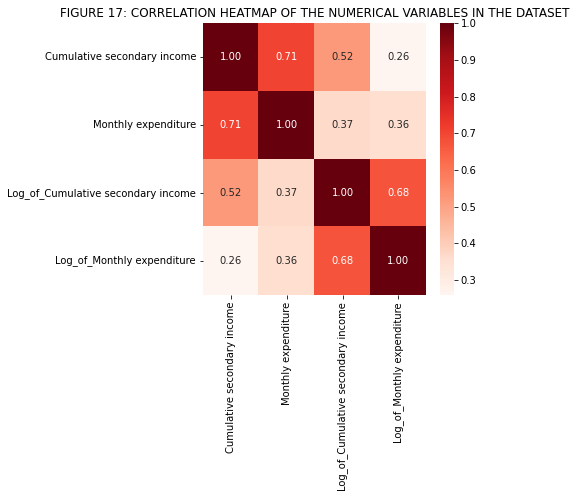

In [36]:
corr = dataset.corr() #specifying a variable to contain the bivariate correlation of all the numerical variables in the dataset

plt.rcParams['figure.figsize']=(5,5) #specifying the figure size

#specifying the heatmap chart alongside its customisations
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, cmap="Reds").\
set(title="FIGURE 17: CORRELATION HEATMAP OF THE NUMERICAL VARIABLES IN THE DATASET")

From Figure 17 above, we can see that whether in the original form (0.71) or in the Log form (0.68), that cumulative secondary income is strongly positively related to monthly expenditure.



---

Now we will go ahead and perform t-tests to test if there is a significant mean diffrence in the cumulative secondary income and/or monthly expenditure of some selected variables.



*   I performed the independent sample t-test and it only works when we are testing for a mean difference of a numerical variable between two groups; hence, the categorical variable must have only TWO groups. For example, male and female in our new Gender variable.

*   The selected binomial categorical variables I used here include: Gender, area of residence, job satisfaction, and tax payment.

Now let's do the real task! 💪

But before that recall that from Figure 7 (shown again below) that our numerical variables had evident outliers.

Sequel to this I made a decision to drop the outliers in order to generate a more reliable output.

Text(0.5, 0.98, 'FIGURE 7: BOXPLOTS OF THE NUMERICAL VARIABLES IN THE DATASET')

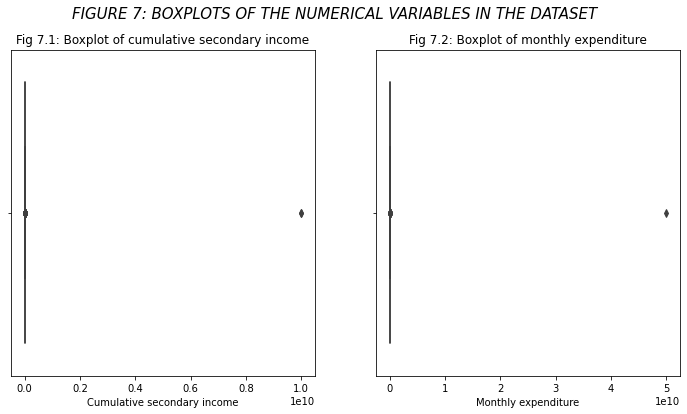

In [37]:
#ORIGINAL BOXPLOT OF THE NUMERICAL VARIABLES

#specifying for the details of the plots
figure, axis = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(x=dataset["Cumulative secondary income"], ax=axis[0]) #boxplot details for cumulative secondary income
sns.boxplot(x=dataset["Monthly expenditure"], ax=axis[1]) #boxplot details for mmonthly expenditure

#specifying the titles of the respective subplots
axis[0].set_title("Fig 7.1: Boxplot of cumulative secondary income")
axis[1].set_title("Fig 7.2: Boxplot of monthly expenditure")

# specifying the title of the main image
plt.suptitle("FIGURE 7: BOXPLOTS OF THE NUMERICAL VARIABLES IN THE DATASET", fontsize=15, fontstyle="oblique")

In [38]:
#making a copy of the dataset so that we can drop the outliers in this copy set and not the original set
dataset1 = dataset.copy()

In [39]:
#Searching for where the new dataset has values above the reasonable limit
#In this case, I used 10,000,000 as the searching limit since both plots in Figure 7 showed that most values are in that 0.1e10 zone
print(np.where(dataset1["Cumulative secondary income"]>10000000))
print(np.where(dataset1["Monthly expenditure"]>10000000))

(array([225, 256]),)
(array([225]),)


In [40]:
#To confirm the above output, I enquired for the respective values of those supposed outliers
print(dataset1.iloc[225,16:18])
print(dataset1.iloc[256,16:18])

Cumulative secondary income    10000000000.0
Monthly expenditure              50000000000
Name: 225, dtype: object
Cumulative secondary income    10000000000.0
Monthly expenditure                    40000
Name: 256, dtype: object


From the output above, this confirms that cases 225 and 226 are truly our outliers, so I went ahead to drop them.

In [41]:
#Specifying code for dropiing the outliers
dataset1.drop([225, 256],inplace = True)

#Confirming the outliers are dropped by comparing the shape of the original dataset with the new dataset which contains the dropped outliers
print(dataset.shape)
print(dataset1.shape)

(303, 26)
(301, 26)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'FIGURE 18: BOXPLOTS AND HISTOGRAMS OF THE NUMERICAL VARIABLES IN THE NEW DATASET WITH NO ORIGINAL OUTLIERS')

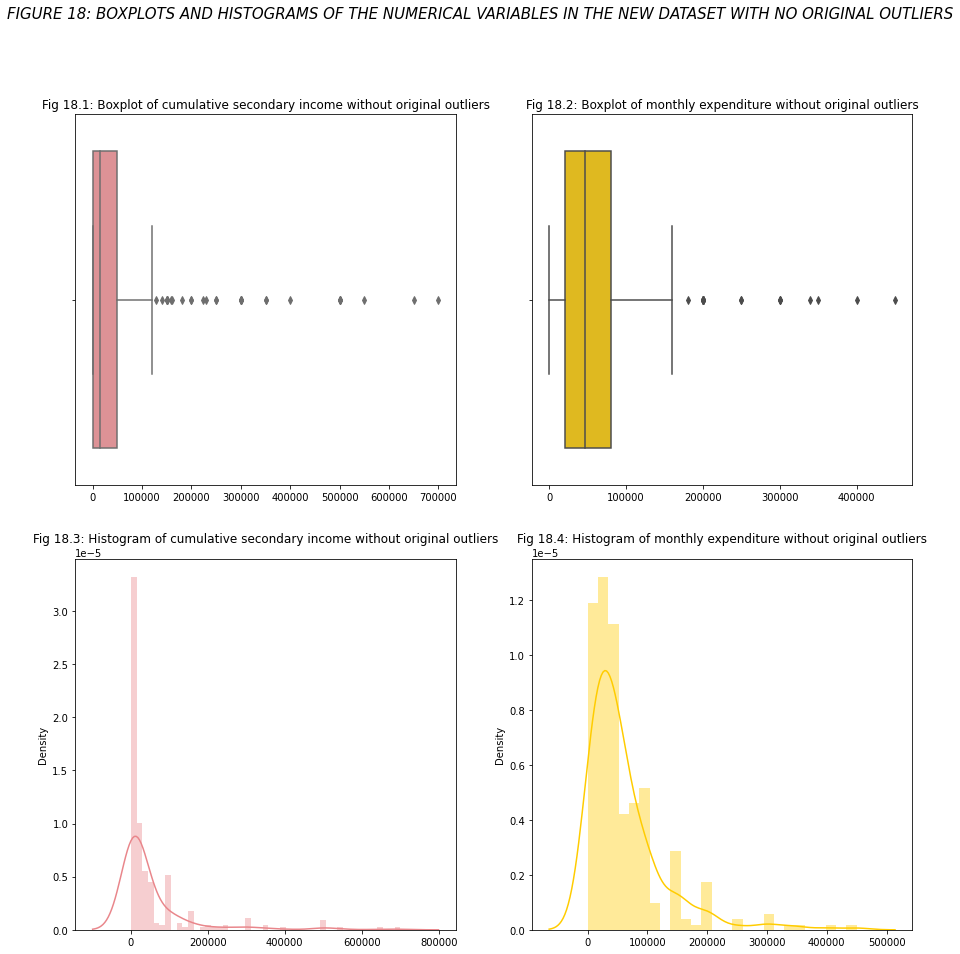

In [42]:
#Visualising the new dataset without the outliers!

#specifying for the details of the plots
figure, axis = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(x=dataset1["Cumulative secondary income"], ax=axis[0,0], color="#e9868b").set(xlabel="") #boxplot for cumulative secondary income
sns.boxplot(x=dataset1["Monthly expenditure"], ax=axis[0,1], color="#ffcc00").set(xlabel="") #boxplot for mmonthly expenditure
sns.distplot(x=dataset1["Cumulative secondary income"], color="#e9868b", ax=axis[1,0]) #histogram for cumulative secondary income
sns.distplot(x=dataset1["Monthly expenditure"], color="#ffcc00", ax=axis[1,1]) #histogram for mmonthly expenditure

#specifying the titles of the respective subplots
axis[0,0].set_title("Fig 18.1: Boxplot of cumulative secondary income without original outliers")
axis[0,1].set_title("Fig 18.2: Boxplot of monthly expenditure without original outliers")
axis[1,0].set_title("Fig 18.3: Histogram of cumulative secondary income without original outliers", y=1.03)
axis[1,1].set_title("Fig 18.4: Histogram of monthly expenditure without original outliers", y=1.03)

# specifying the title of the main image
plt.suptitle("FIGURE 18: BOXPLOTS AND HISTOGRAMS OF THE NUMERICAL VARIABLES IN THE NEW DATASET WITH NO ORIGINAL OUTLIERS", fontsize=15, fontstyle="oblique")

Figure 18 above now showed a reasonable boxplot with new outliers but in this case, they are more realistic.

Furthermore, the secondary income also resembles the monthly primary income that we earlier saw in the descriptive section where most people were earning less than 100,000.

This means that we can progress with performing the statistical tests and interpreting them.

              Independent t-test     results
0  Difference (Male - Female) =   18593.6550
1          Degrees of freedom =     299.0000
2                           t =       1.4066
3       Two side test p value =       0.1606
4      Difference < 0 p value =       0.9197
5      Difference > 0 p value =       0.0803
6                   Cohen's d =       0.1801
7                   Hedge's g =       0.1797
8               Glass's delta =       0.1670
9                 Pearson's r =       0.0811


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Male,216.0,56936.949074,111360.503922,7577.122559,42001.992535,71871.905613
1,Female,85.0,38343.294118,78722.599880,8538.664816,21363.222722,55323.365513
2,combined,301.0,51686.249169,103407.069704,5960.284410,39956.987531,63415.510808


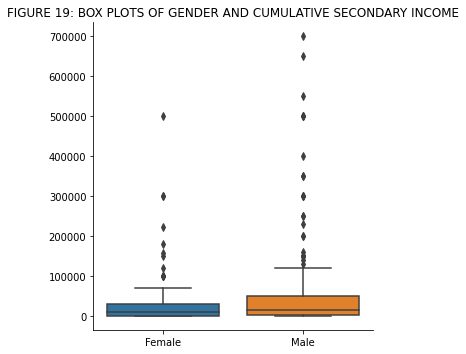

In [57]:
#Specifying the t-test code
summary_CSE_Gender, results_CSE_Gender = rp.ttest(group1= dataset1["Cumulative secondary income"][dataset1["new Gender"] == "Male"], group1_name= "Male",
                            group2= dataset1["Cumulative secondary income"][dataset1["new Gender"] == "Female"], group2_name= "Female")

#asking for the statistical results
print(results_CSE_Gender)

#requesting for a chart representation of the tested variables
sns.catplot(x="new Gender", y="Cumulative secondary income", kind="box", data=dataset1).\
set(title="FIGURE 19: BOX PLOTS OF GENDER AND CUMULATIVE SECONDARY INCOME", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_CSE_Gender

P-value = 0.1606

Mean difference (Male - Female) =  18593.6550

This means that although males have higher mean (average) of secondary income than females, this difference is not statistically significant because p-value is greater than 0.05

              Independent t-test     results
0  Difference (Male - Female) =   11951.7300
1          Degrees of freedom =     299.0000
2                           t =       1.3968
3       Two side test p value =       0.1635
4      Difference < 0 p value =       0.9182
5      Difference > 0 p value =       0.0818
6                   Cohen's d =       0.1788
7                   Hedge's g =       0.1784
8               Glass's delta =       0.1789
9                 Pearson's r =       0.0805


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Male,216.0,65359.106481,66806.540572,4545.609330,56399.441746,74318.771217
1,Female,85.0,53407.376471,66875.992832,7253.719871,38982.559015,67832.193927
2,combined,301.0,61984.033223,66931.904399,3857.890833,54392.078234,69575.988211


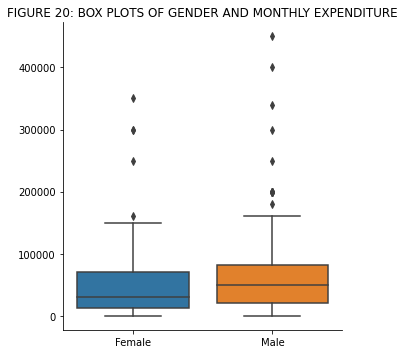

In [58]:
#Specifying the t-test code
summary_ME_Gender, results_ME_Gender = rp.ttest(group1= dataset1["Monthly expenditure"][dataset1["new Gender"] == "Male"], group1_name= "Male",
                            group2= dataset1["Monthly expenditure"][dataset1["new Gender"] == "Female"], group2_name= "Female")

#asking for the statistical results
print(results_ME_Gender)

#requesting for a chart representation of the tested variables
sns.catplot(x="new Gender", y="Monthly expenditure", kind="box", data=dataset1).\
set(title="FIGURE 20: BOX PLOTS OF GENDER AND MONTHLY EXPENDITURE", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_ME_Gender

P-value = 0.1635

Mean difference (Male - Female) =  11951.7300

This also means that although males have higher mean (average) of monthly expenditures than females, this difference is still not statistically significant because p-value is greater than 0.05

              Independent t-test    results
0  Difference (Rural - Urban) =  -9287.3420
1          Degrees of freedom =    299.0000
2                           t =     -0.5110
3       Two side test p value =      0.6097
4      Difference < 0 p value =      0.3049
5      Difference > 0 p value =      0.6951
6                   Cohen's d =     -0.0897
7                   Hedge's g =     -0.0895
8               Glass's delta =     -0.1034
9                 Pearson's r =      0.0295


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Rural,37.0,43540.540541,89849.749457,14771.207820,13583.142573,73497.938508
1,Urban,264.0,52827.882576,105269.531066,6478.891767,40070.782884,65584.982268
2,combined,301.0,51686.249169,103407.069704,5960.284410,39956.987531,63415.510808


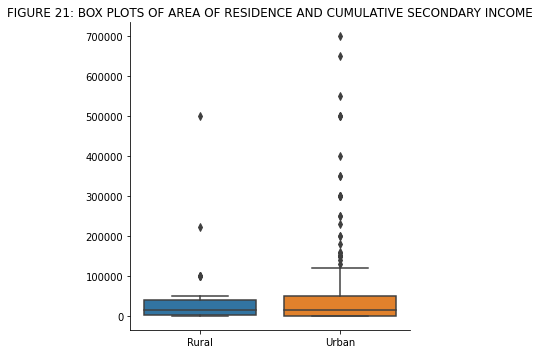

In [59]:
#Specifying the t-test code
summary_CSE_residence, results_CSE_residence = rp.ttest(group1= dataset1["Cumulative secondary income"]\
                                                        [dataset1["new Area of residence"] == "Rural"], group1_name= "Rural",
                            group2= dataset1["Cumulative secondary income"]\
                            [dataset1["new Area of residence"] == "Urban"], group2_name= "Urban")

#asking for the statistical results
print(results_CSE_residence)

#requesting for a chart representation of the tested variables
sns.catplot(x="new Area of residence", y="Cumulative secondary income", kind="box", data=dataset1).\
set(title="FIGURE 21: BOX PLOTS OF AREA OF RESIDENCE AND CUMULATIVE SECONDARY INCOME", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_CSE_residence

P-value = 0.6097

Mean difference (Rural - Urban) =  -9287.3420

This means that those in rural areas have lesser secondary income, but this difference is still not statistically significant because p-value is greater than 0.05

              Independent t-test     results
0  Difference (Rural - Urban) =  -12430.9558
1          Degrees of freedom =     299.0000
2                           t =      -1.0582
3       Two side test p value =       0.2908
4      Difference < 0 p value =       0.1454
5      Difference > 0 p value =       0.8546
6                   Cohen's d =      -0.1858
7                   Hedge's g =      -0.1853
8               Glass's delta =      -0.2563
9                 Pearson's r =       0.0611


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Rural,37.0,51081.135135,48498.153584,7973.047335,34911.045665,67251.224605
1,Urban,264.0,63512.090909,69058.708095,4250.269672,55143.203779,71880.978040
2,combined,301.0,61984.033223,66931.904399,3857.890833,54392.078234,69575.988211


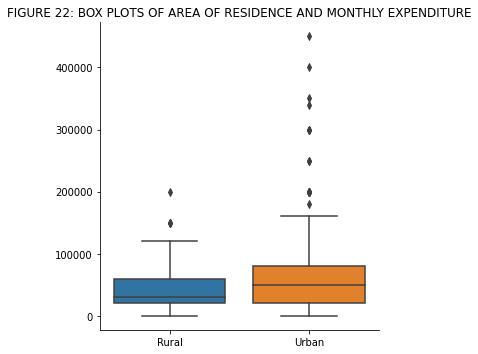

In [60]:
#Specifying the t-test code
summary_ME_residence, results_ME_residence = rp.ttest(group1= dataset1["Monthly expenditure"]\
                                                      [dataset1["new Area of residence"] == "Rural"], group1_name= "Rural",
                            group2= dataset1["Monthly expenditure"]\
                            [dataset1["new Area of residence"] == "Urban"], group2_name= "Urban")

#asking for the statistical results
print(results_ME_residence)

#requesting for a chart representation of the tested variables
sns.catplot(x="new Area of residence", y="Monthly expenditure", kind="box", data=dataset1).\
set(title="FIGURE 22: BOX PLOTS OF AREA OF RESIDENCE AND MONTHLY EXPENDITURE", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_ME_residence

P-value = 0.2908

Mean difference (Rural - Urban) =  -12430.9558

Equally, those in rural areas have lesser monthly expenditure, but is this statistically significant?

No!
P-value is greater than 0.05

                          Independent t-test     results
0  Difference (Satisfied - Not satisfied) =   15135.9644
1                      Degrees of freedom =     299.0000
2                                       t =       1.2540
3                   Two side test p value =       0.2108
4                  Difference < 0 p value =       0.8946
5                  Difference > 0 p value =       0.1054
6                               Cohen's d =       0.1465
7                               Hedge's g =       0.1461
8                           Glass's delta =       0.1288
9                             Pearson's r =       0.0723


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Satisfied,175.0,58022.234286,117557.196364,8886.488754,40483.047502,75561.421070
1,Not satisfied,126.0,42886.269841,79321.980457,7066.563669,28900.663313,56871.876370
2,combined,301.0,51686.249169,103407.069704,5960.284410,39956.987531,63415.510808


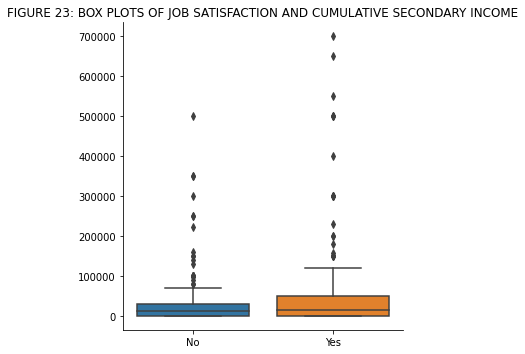

In [61]:
#Specifying the t-test code
summary_CSE_job_satisfy, results_CSE_job_satisfy = rp.ttest(group1= dataset1["Cumulative secondary income"]\
                                                            [dataset1["Job satisfaction"] == "Yes"], group1_name= "Satisfied",
                            group2= dataset1["Cumulative secondary income"]\
                            [dataset1["Job satisfaction"] == "No"], group2_name= "Not satisfied")

#asking for the statistical results
print(results_CSE_job_satisfy)

#requesting for a chart representation of the tested variables
sns.catplot(x="Job satisfaction", y="Cumulative secondary income", kind="box", data=dataset1).\
set(title="FIGURE 23: BOX PLOTS OF JOB SATISFACTION AND CUMULATIVE SECONDARY INCOME", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_CSE_job_satisfy

P-value = 0.2108

Mean difference (Satisfied - Not satisfied) =   15135.9644

This means that those satisfied with their jobs have higher secondary income, but this difference is still not statistically significant because p-value is greater than 0.05

                          Independent t-test     results
0  Difference (Satisfied - Not satisfied) =   15449.9435
1                      Degrees of freedom =     299.0000
2                                       t =       1.9853
3                   Two side test p value =       0.0480
4                  Difference < 0 p value =       0.9760
5                  Difference > 0 p value =       0.0240
6                               Cohen's d =       0.2320
7                               Hedge's g =       0.2314
8                           Glass's delta =       0.2006
9                             Pearson's r =       0.1141


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Satisfied,175.0,68451.451429,77015.891033,5821.854133,56960.907762,79941.995095
1,Not satisfied,126.0,53001.507937,48530.886649,4323.475012,44444.814303,61558.201570
2,combined,301.0,61984.033223,66931.904399,3857.890833,54392.078234,69575.988211


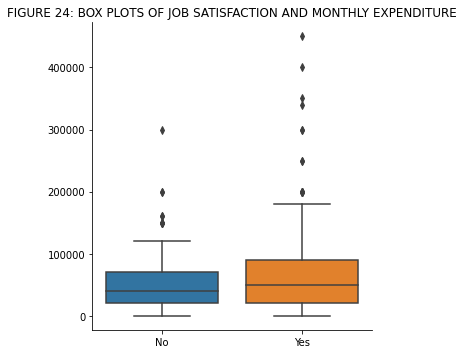

In [62]:
#Specifying the code
summary_ME_job_satisfy, results_ME_job_satisfy = rp.ttest(group1= dataset1["Monthly expenditure"]\
                                                          [dataset1["Job satisfaction"] == "Yes"], group1_name= "Satisfied",
                            group2= dataset1["Monthly expenditure"]\
                            [dataset1["Job satisfaction"] == "No"], group2_name= "Not satisfied")

#asking for the statistical results
print(results_ME_job_satisfy)

#requesting for a chart representation of the tested variables
sns.catplot(x="Job satisfaction", y="Monthly expenditure", kind="box", data=dataset1).\
set(title="FIGURE 24: BOX PLOTS OF JOB SATISFACTION AND MONTHLY EXPENDITURE", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_ME_job_satisfy

P-value = 0.0480

Mean difference (Satisfied - Not satisfied) =   15449.9435

In this case, those satisfied with their jobs have higher monthly expenditure, and this difference is statistically significant because p-value is lesser than 0.05

                            Independent t-test     results
0  Difference (Pays tax - Does not pay tax) =   25545.3771
1                        Degrees of freedom =     299.0000
2                                         t =       2.1268
3                     Two side test p value =       0.0343
4                    Difference < 0 p value =       0.9829
5                    Difference > 0 p value =       0.0171
6                                 Cohen's d =       0.2485
7                                 Hedge's g =       0.2479
8                             Glass's delta =       0.2283
9                               Pearson's r =       0.1221


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pays tax,175.0,62379.662857,111914.740228,8459.959162,45682.313878,79077.011837
1,Does not pay tax,126.0,36834.285714,88578.469821,7891.197284,21216.626918,52451.944511
2,combined,301.0,51686.249169,103407.069704,5960.284410,39956.987531,63415.510808


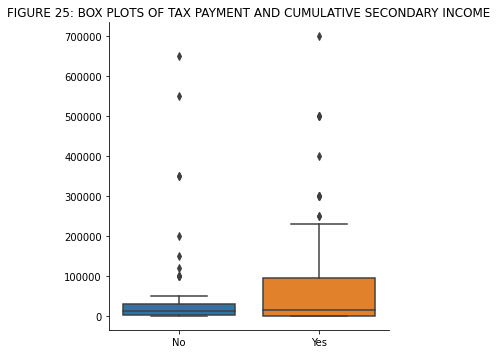

In [63]:
#Specifying the t-test code
summary_CSE_pays_tax, results_CSE_pays_tax = rp.ttest(group1= dataset1["Cumulative secondary income"]\
                                                            [dataset1["Pays tax"] == "Yes"], group1_name= "Pays tax",
                            group2= dataset1["Cumulative secondary income"]\
                            [dataset1["Pays tax"] == "No"], group2_name= "Does not pay tax")

#asking for the statistical results
print(results_CSE_pays_tax)

#requesting for a chart representation of the tested variables
sns.catplot(x="Pays tax", y="Cumulative secondary income", kind="box", data=dataset1).\
set(title="FIGURE 25: BOX PLOTS OF TAX PAYMENT AND CUMULATIVE SECONDARY INCOME", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_CSE_pays_tax

P-value = 0.0343

Mean difference (Pays tax - Does not pay tax) =   25545.3771

The cumulative secondary income of those who pay tax is statistically significant (because p is less than 0.05).

Let us now see if it is the same for their monthly expenditure

                            Independent t-test     results
0  Difference (Pays tax - Does not pay tax) =   30873.4702
1                        Degrees of freedom =     299.0000
2                                         t =       4.0479
3                     Two side test p value =       0.0001
4                    Difference < 0 p value =       1.0000
5                    Difference > 0 p value =       0.0000
6                                 Cohen's d =       0.4729
7                                 Hedge's g =       0.4718
8                             Glass's delta =       0.4418
9                               Pearson's r =       0.2279


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pays tax,175.0,74907.811429,69882.723146,5282.637325,64481.515360,85334.107497
1,Does not pay tax,126.0,44034.341270,58267.870377,5190.914467,33760.877299,54307.805241
2,combined,301.0,61984.033223,66931.904399,3857.890833,54392.078234,69575.988211


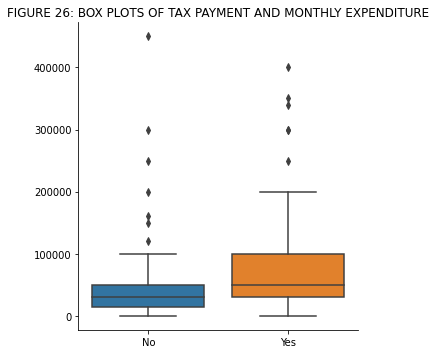

In [64]:
#Specifying the t-test code
summary_ME_pays_tax, results_ME_pays_tax = rp.ttest(group1= dataset1["Monthly expenditure"]\
                                                            [dataset1["Pays tax"] == "Yes"], group1_name= "Pays tax",
                            group2= dataset1["Monthly expenditure"]\
                            [dataset1["Pays tax"] == "No"], group2_name= "Does not pay tax")

#asking for the statistical results
print(results_ME_pays_tax)

#requesting for a chart representation of the tested variables
sns.catplot(x="Pays tax", y="Monthly expenditure", kind="box", data=dataset1).\
set(title="FIGURE 26: BOX PLOTS OF TAX PAYMENT AND MONTHLY EXPENDITURE", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_ME_pays_tax

Now this is where the real deal happened 😅

P-value = 0.0001

Mean difference (Pays tax - Does not pay tax) =   30873.4702

The monthly expenditure of those who pay tax is obviously statistically significant (because p is not just less than 0.05 but almost 0).

Recall that occupation was well related to tax payment; in the tasks that I will perform onwards, we will explore if occupation it is also significant

In [65]:
#Recoding a very new variable for occupation where they will be divided into professionals and non-professionals
original_new_occupation = ['None', 'Professional', 'Business', 'Others']
new_new_occupation = ["Non-Professional", "Professional", "Non-Professional", "Non-Professional"]
dataset1["new new Occupation"] = dataset1["new Occupation"].replace(original_new_occupation, new_new_occupation)
print("new new occupation values:")
print(dataset1["new new Occupation"].unique())

new new occupation values:
['Non-Professional' 'Professional']


                                Independent t-test    results
0  Difference (Non-Professional - Professional) =  -5896.0196
1                            Degrees of freedom =    299.0000
2                                             t =     -0.4910
3                         Two side test p value =      0.6238
4                        Difference < 0 p value =      0.3119
5                        Difference > 0 p value =      0.6881
6                                     Cohen's d =     -0.0569
7                                     Hedge's g =     -0.0568
8                                 Glass's delta =     -0.0548
9                                   Pearson's r =      0.0284


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-Professional,167.0,49061.443114,107566.267199,8323.727660,32627.426787,65495.459441
1,Professional,134.0,54957.462687,98279.134368,8490.024107,38164.523870,71750.401503
2,combined,301.0,51686.249169,103407.069704,5960.284410,39956.987531,63415.510808


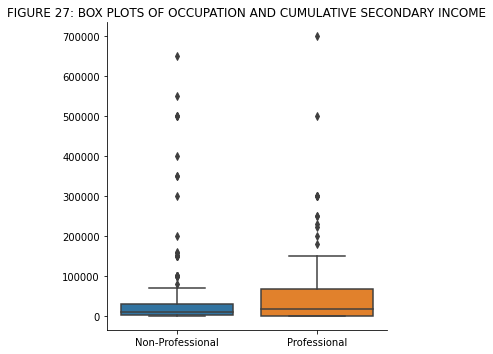

In [66]:
#Specifying the t-test code
summary_CSE_occupation, results_CSE_occupation = rp.ttest(group1= dataset1["Cumulative secondary income"]\
                                                            [dataset1["new new Occupation"] == "Non-Professional"],\
                                                         group1_name= "Non-Professional",
                            group2= dataset1["Cumulative secondary income"]\
                            [dataset1["new new Occupation"] == "Professional"], group2_name= "Professional")

#asking for the statistical results
print(results_CSE_occupation)

#requesting for a chart representation of the tested variables
sns.catplot(x="new new Occupation", y="Cumulative secondary income", kind="box", data=dataset1).\
set(title="FIGURE 27: BOX PLOTS OF OCCUPATION AND CUMULATIVE SECONDARY INCOME", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_CSE_occupation

Now this is where the real deal happened 😅

P-value = 0.6238

Mean difference (Non-Professional - Professional) =  -5896.0196

Unlike in tax payment, the occupation (professional vs non-professional) does not significantly their cumulative secondary income (because p is greater than 0.05).


                                Independent t-test     results
0  Difference (Non-Professional - Professional) =  -30906.3775
1                            Degrees of freedom =     299.0000
2                                             t =      -4.0842
3                         Two side test p value =       0.0001
4                        Difference < 0 p value =       0.0000
5                        Difference > 0 p value =       1.0000
6                                     Cohen's d =      -0.4737
7                                     Hedge's g =      -0.4725
8                                 Glass's delta =      -0.4834
9                                   Pearson's r =       0.2299


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-Professional,167.0,48225.047904,63930.054351,4947.056131,38457.789224,57992.306584
1,Professional,134.0,79131.425373,66857.394818,5775.599240,67707.513799,90555.336947
2,combined,301.0,61984.033223,66931.904399,3857.890833,54392.078234,69575.988211


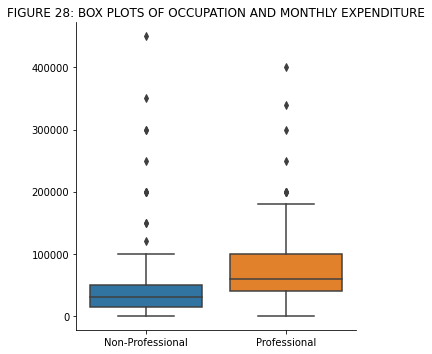

In [68]:
#Specifying the t-test code
summary_ME_occupation, results_ME_occupation = rp.ttest(group1= dataset1["Monthly expenditure"]\
                                                            [dataset1["new new Occupation"] == "Non-Professional"],\
                                                         group1_name= "Non-Professional",
                            group2= dataset1["Monthly expenditure"]\
                            [dataset1["new new Occupation"] == "Professional"], group2_name= "Professional")

#asking for the statistical results
print(results_ME_occupation)

#requesting for a chart representation of the tested variables
sns.catplot(x="new new Occupation", y="Monthly expenditure", kind="box", data=dataset1).\
set(title="FIGURE 28: BOX PLOTS OF OCCUPATION AND MONTHLY EXPENDITURE", xlabel="", ylabel="")

#requesting for the descriptive summary
summary_ME_occupation

Just like in tax payment, the real deal happened here again 😅

P-value = 0.0001

Mean difference (Non-Professional - Professional) =  -30906.3775

So, even though their primary occupation does not determine their cumulative secondary income, it however influenced their monthly expenditures(because p is not just less than 0.05 but almost 0).

This is this to say that professionals spend higher than their counterparts.

**AND THIS BRINGS US TO THE END OF THIS ANALYSIS!**

# Conclusion, Limitations, Challenges, and Lessons learned

**CONCLUSION**

In this project, I have analysed a given dataset from Kadatemy, presenting the features of the data using descriptive statistics and making further explorations using visualisations and statistical tests, while using a semi-formal tone in order to keep my reader engaged.

I performed the task in four major sections viz:


1.   Data pre-processing

2.   Descriptive analysis

3.   Explring relationships using charts

4.   Exploring relationships with statistical tests

From the analysis of the data, I made the following deductions:


*   The respondents herein are mostly males, of younger age, lives in urban areas and mostly in Lagos state, Nigeria. They are predominantly professional workers, while having secondary sources of income as freelancers or contractors.

*   Overall, the monthly income from primary source is low (less than 100,000 NGN), yet most expenses are consumed by feeding, transportation, and rent.

*   With respect to the prices of food items; they are majorly costly, with Fish and oil (vegetable and palm oil) topping the charts across the years (2016-2019).

*   Their occupations influenced their monthly expenditures where those who have professional jobs such as software engineers, health professionals, etc, have higher monthly expenditure than their counterparts.


*   Even though they have negative opinions about the country, they are however, mostly hopeful for the country, Nigeria.


*   Lastly, the higher the cumulative secondary income, the higher the expenditure



---



**LIMITATIONS AND CHALLENGES**

In performing this project, I encountered the following limitations and challenges:



*   Their is a possibility of analysing string data with a library called Word cloud, however, I do not understand that computation yet.

*   Monthly primary income and ages were collected as object(categorical) data; it would have been more resourceful if they were collected as plain numerical data. That way, it would have been easier to group as desired, and to even calculate net income.

*   Performing statistical tests like Chi-square, ANOVA, and the rest seems to be somewhat complex.


*   Some plots cannot be contained in a subplot as desired, for example, catplots; hence I had to perform them individually.


*   Log form of a numerical variable may not satisfactorily normalise a data enough to use it for statistical tests.

*   Customisation of seaborn and matplotlib charts are not exactly the same, hence one must have to keep going to and fro to ensure functionality.





---



**LESSONS LEARNED**

While I encountered several challenges while performing this project, I equally learned some wonderful things beyond what I was taught in class. Some of these include:


*   Title of plots can be re-positioned if its obstructing the upper border of a chart

*   OneHot encoding of multiple choice answers

*   Subplots for multiple charts presentation can make discussion smoother than just one-by-one charts.

*   In cases where all the x-ticks of a chart are not showing, it can be rectified with some lines of codes.

*   Recoding variables into manageable forms is good.

*   I also learnt how to perform t-test using python.

*   and how to deal with worrisome outliers.



---



**FINAL WORDS**

Thank you for viewing this project up till this last point.

As a beginner in python, it has been a challenging project for me and I would love to hear from you about what you think regarding my performance.

Cheers and see you when next I post,
Dr. STM 💖